
# Analysis of Annual Earnings of U.S. Citizens
Tomasz Jastrzębski ([Kaggle Link](https://www.kaggle.com/jastrzt2)),
Igor Piotrowiak ([Kaggle Link](https://www.kaggle.com/igorpiotrowiak))

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:.2f}".format 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/americancitizenincome/income.csv')

# 1. Data Exploration
## 1.1 Basic Analysis

In [3]:
print(df.info())
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB
None


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0,0,33,United-States,<=50K
8,37,Private,66686,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9,44,Private,227399,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,<=50K


The basic dataset information is as follows:

Number of instances: 25000
Number of attributes: 15
Number of categories: 2
Instances in class >50K  =  6045
Instances in class <=50K  =  18955


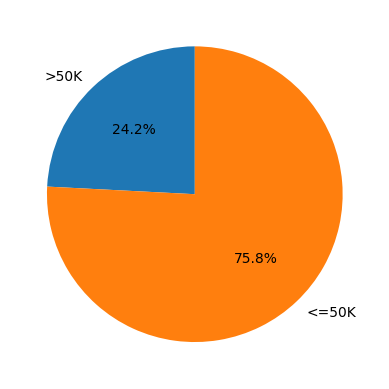

In [4]:
num_rows = df.shape[0]
num_columns = df.shape[1]
num_categories = df.iloc[:, -1].unique().shape[0]

print("Number of instances:", num_rows)
print("Number of attributes:", num_columns)
print("Number of categories:", num_categories)

fig1, ax1 = plt.subplots()
class_sizes = []
labels = []
for i in list(df.iloc[:, -1].unique()):
    print('Instances in class', i, ' = ', len(df[df['income'] == i]))
    class_sizes.append(len(df[df['income'] == i]))
    labels.append(i)

ax1.pie(class_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


To ensure the correctness of the analyzed data, we check for completeness. In this case, it requires replacing all question marks with NaN values.

In [5]:
df = df.replace('?', np.NaN)  
total_nan_count = df.isna().sum().sum()  
print("Number of missing values:", total_nan_count)  

Number of missing values: 3300


To analyze the nature of missing data, we check which attributes contain missing values:

NaN Counts in Each Column:
age                  0
workclass         1429
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1434
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     437
income               0
dtype: int64


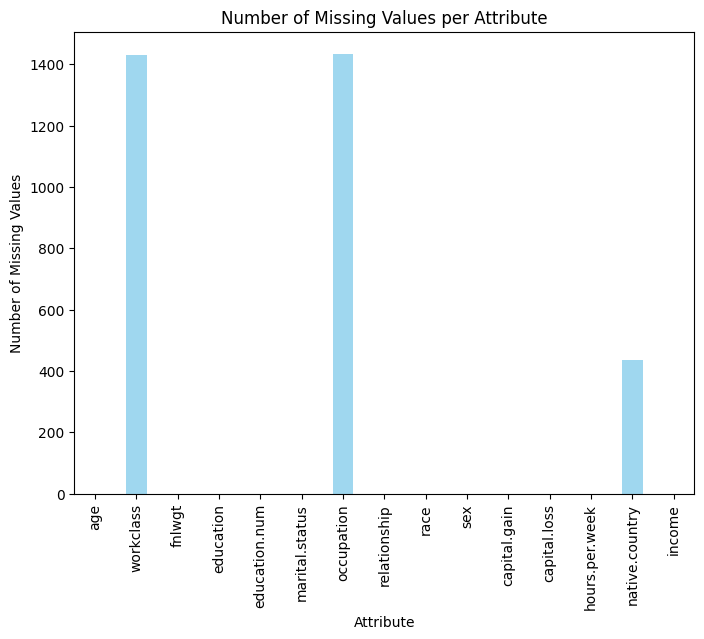

In [6]:
nan_counts = df.isna().sum()

print("NaN Counts in Each Column:")
print(nan_counts)

plt.figure(figsize=(8, 6))
nan_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Missing Values per Attribute')
plt.xlabel('Attribute')
plt.ylabel('Number of Missing Values')
plt.show()

As seen in the chart, missing values appear only in three attributes: workclass, occupation, and native.country. Since the absence of data in these attributes may provide meaningful information about the group they describe, we decided to replace NaN values with the label 'unknown' and keep them for further analysis.

In [7]:
df = df.replace(np.NaN, 'unknown')

We also need to check if there are any duplicate records in the dataset.

In [8]:
print("Number of duplicates: ", df.duplicated().sum())
duplicates = df[df.duplicated(keep=False)]
print("Duplicated instances:")
print(duplicates)

Number of duplicates:  12
Duplicated instances:
       age workclass  fnlwgt     education  education.num      marital.status  \
1578    25   Private  195994       1st-4th              2       Never-married   
1945    90   Private   52386  Some-college             10       Never-married   
2501    25   Private  195994       1st-4th              2       Never-married   
4677    19   Private   97261       HS-grad              9       Never-married   
5206    90   Private   52386  Some-college             10       Never-married   
5510    19   Private  138153  Some-college             10       Never-married   
5894    30   Private  144593       HS-grad              9       Never-married   
8847    27   Private  255582       HS-grad              9       Never-married   
9946    19   Private  138153  Some-college             10       Never-married   
10845   28   Private  274679       Masters             14       Never-married   
12521   19   Private   97261       HS-grad              9    

As seen, there are 12 rows in the data that repeat twice. This is likely a data error, so these rows will not be considered in further analysis. According to the project lead's instructions, we will also remove the *"fnlwgt"* attribute due to its undefined nature.

In [9]:
df = df.drop_duplicates()
df = df.drop(columns = 'fnlwgt', axis =1)

## 1.2 Attribute Analysis

### 1.2.1 Analysis of Numerical Attributes

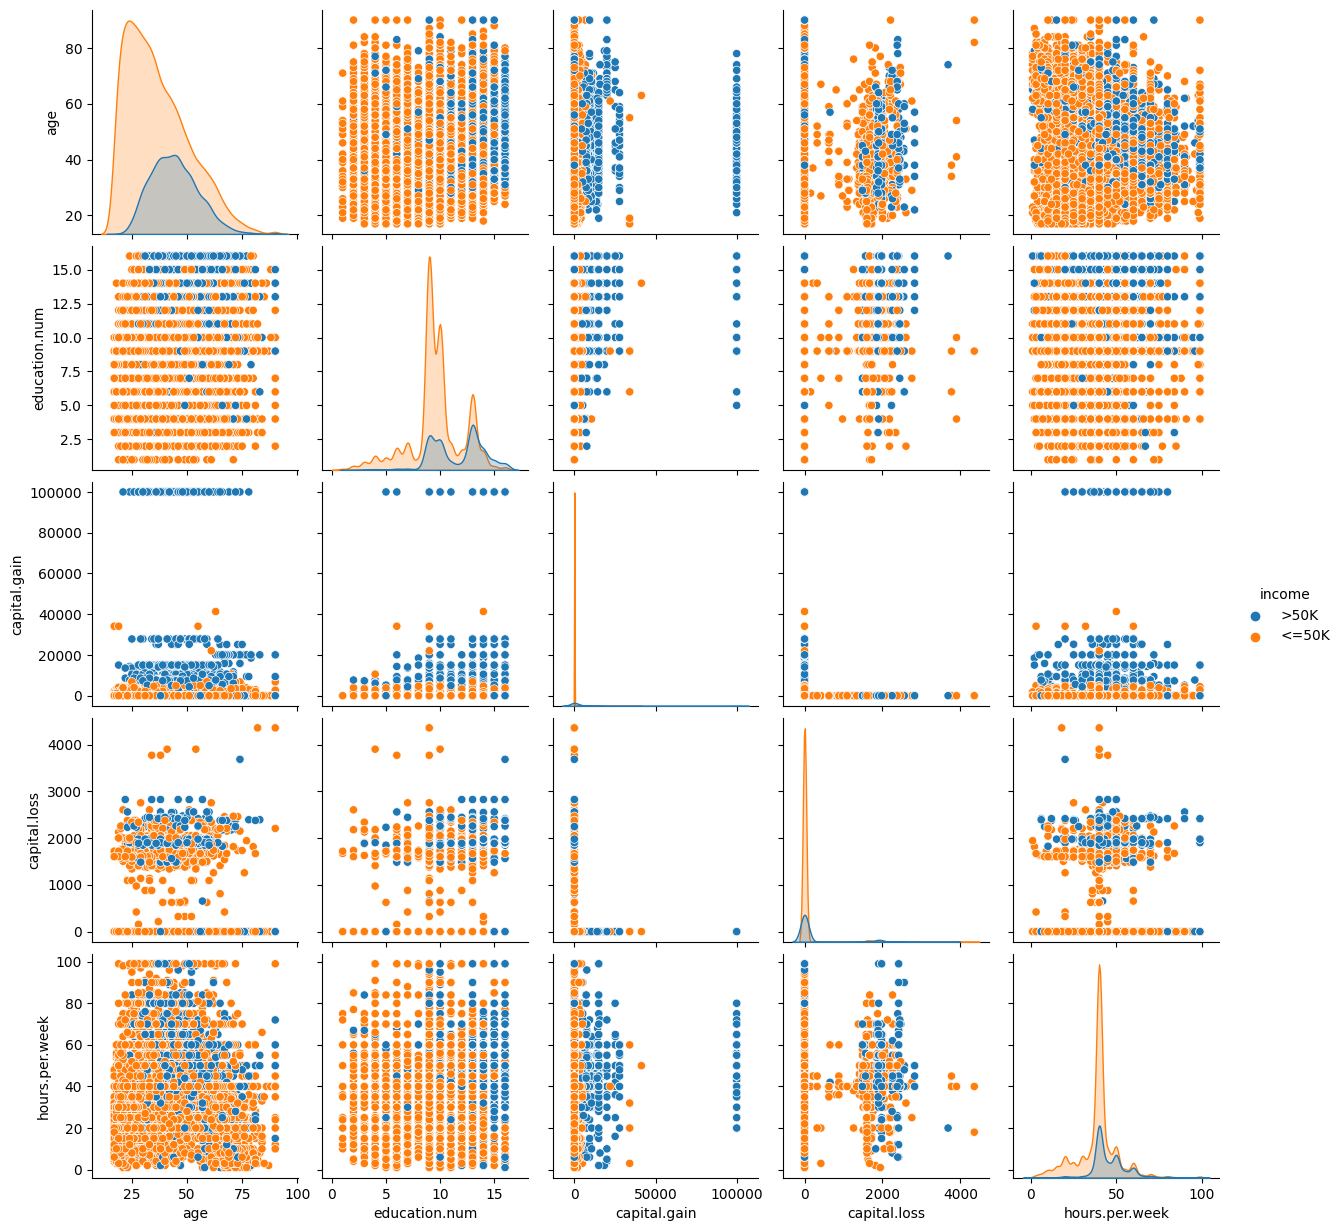

In [10]:
sns.pairplot(data = df, kind = 'scatter', hue = 'income')

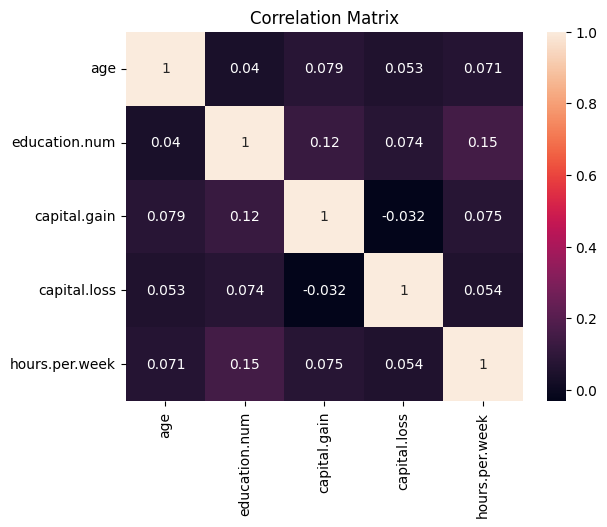

In [11]:
numerical_attributes = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_attributes].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

From the above analysis, it is clear that there are no attributes that clearly divide the dataset into distinct categories. However, some attributes perform this task better than others. These include: capital.gain, capital.loss, education.num, and hours.per.week. The ability of these attributes to differentiate groups earning less or more than $50,000 annually can be easily explained: people with lower incomes tend to invest less (capital.gain, capital.loss), have statistically lower education levels, and people in managerial positions (who generally earn higher salaries) are less likely to take vacations.

As seen in the correlation matrix, very few attributes show a strong correlation with each other. The highest correlation is observed between education-related attributes and hours worked, followed by education and capital gain (0.15 and 0.12, respectively). The smallest correlations are found between capital.gain/ capital.loss and fnlwgt (0.0022 and -0.0057, respectively).

To examine the distribution of each numerical attribute, we used histograms. As seen in the plots, none of the attributes follow a normal distribution. The dataset is dominated by younger individuals, so the distribution is heavily skewed to the left. Most of the instances fall into three education levels, and regarding the capital-related attributes (capital.gain and capital.loss), the overwhelming majority of instances have a value of zero for these attributes.

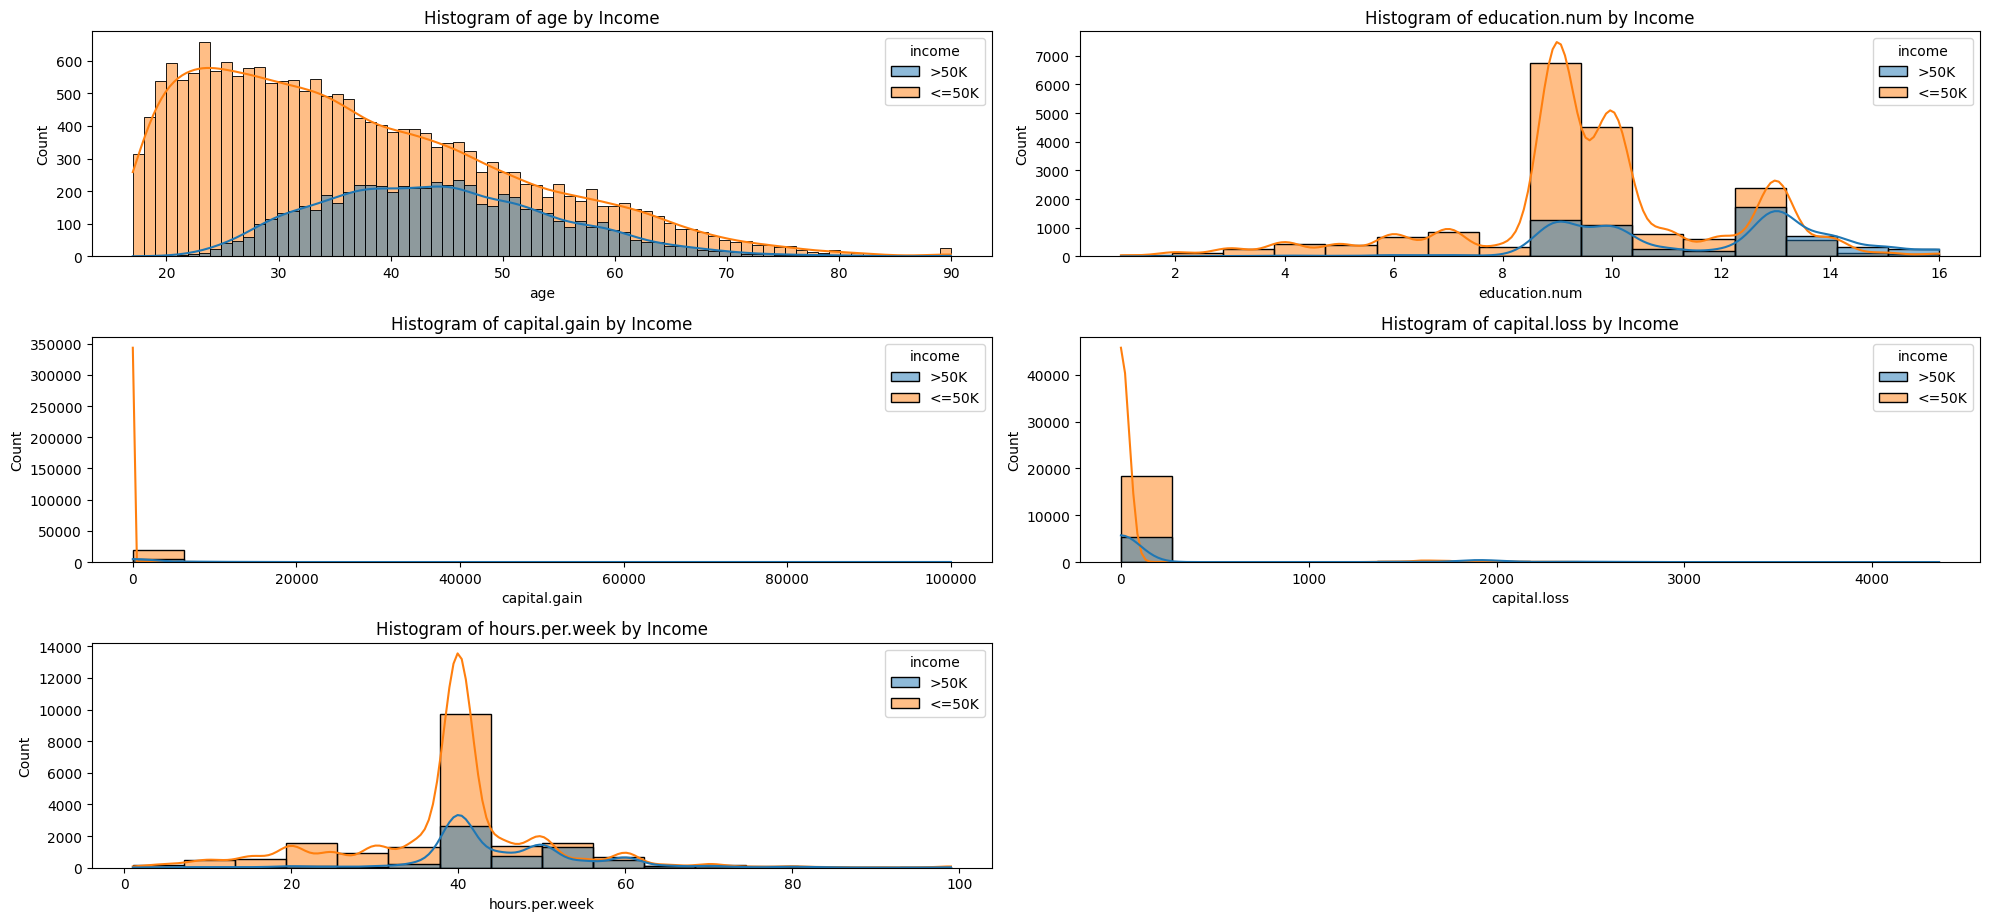

In [12]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns_list = numeric_columns.tolist()

plt.figure(figsize=(20, 15))

numeric_columns_list.pop(0)

plt.subplot(len(numeric_columns), 2, 1)
sns.histplot(data=df, x='age', hue="income", kde=True,bins = 74)
plt.title(f'Histogram of age by Income')
plt.xlabel('age')
plt.ylabel('Count')

for i, column in enumerate(numeric_columns_list, 1):
    plt.subplot(len(numeric_columns), 2, i+1)
    sns.histplot(data=df, x=column, hue="income", kde=True, bins = 16)
    plt.title(f'Histogram of {column} by Income')
    plt.xlabel(column)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

The analysis of boxplots and violin plots, considering all attributes simultaneously, is significantly complicated by the *capital.gain* and *capital.loss* attributes, which exhibit a relatively large range of variability. The situation is not improved by the use of class division.

<Axes: >

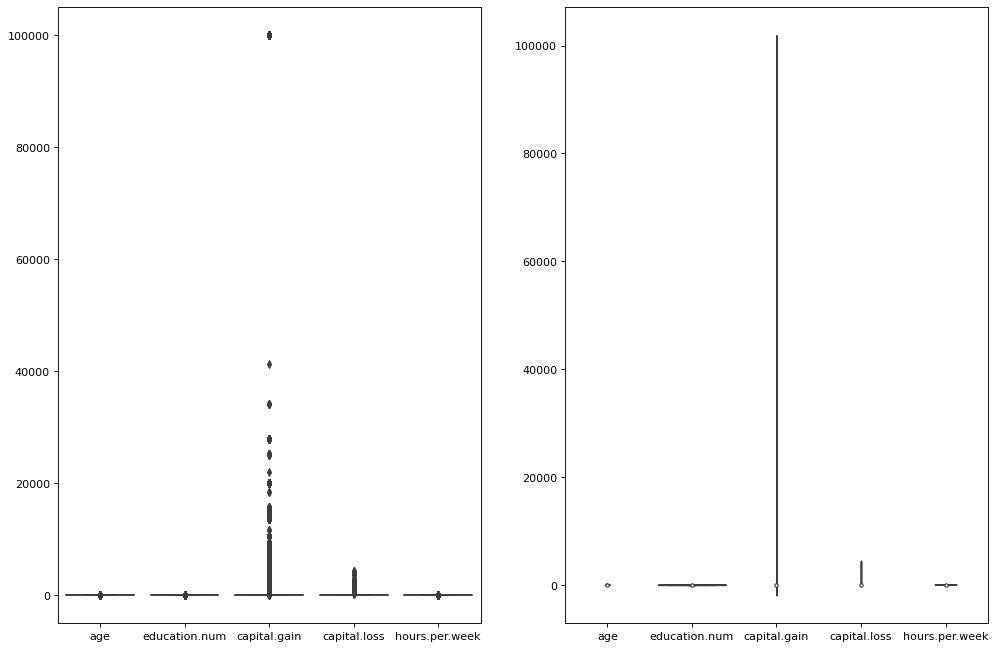

In [13]:
plt.figure(figsize = (15,10), dpi = 80)
plt.subplot(1,2,1)
sns.boxplot(data = df)
plt.subplot(1,2,2)
sns.violinplot(data = df)

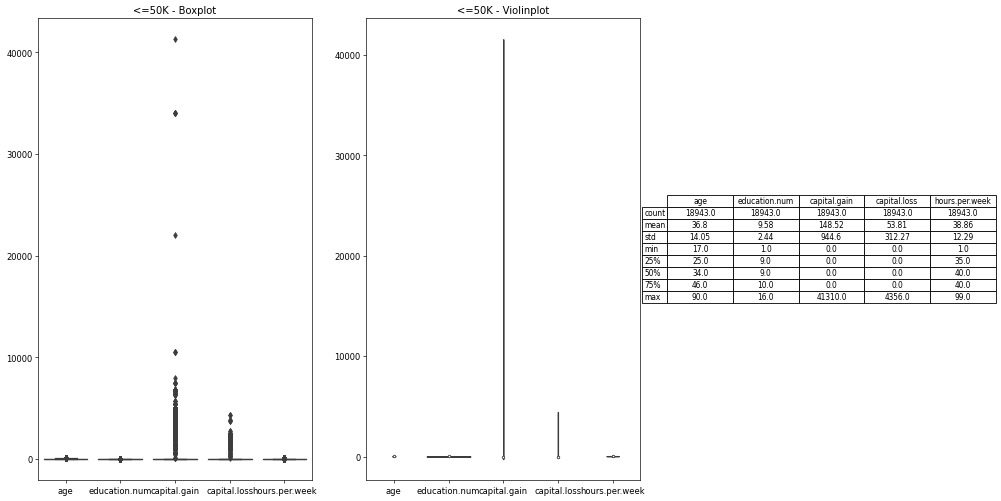

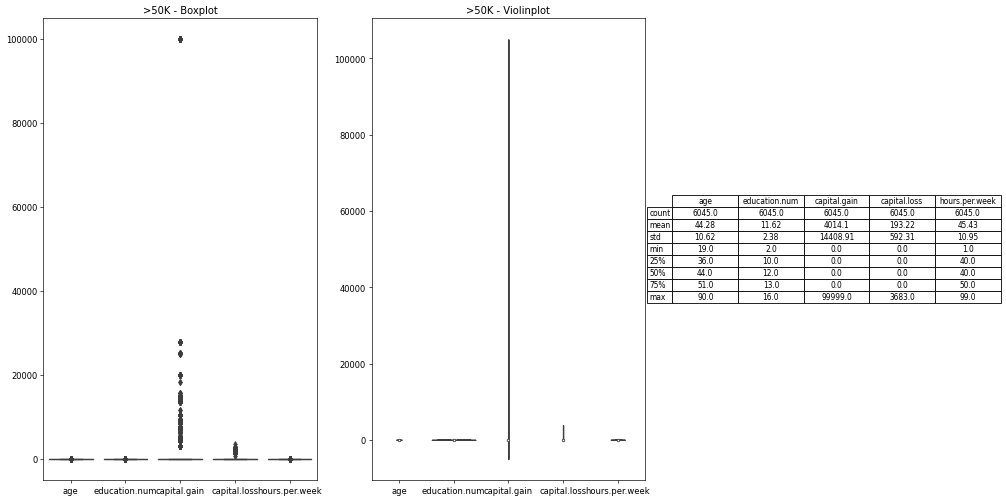

In [14]:
for kl in sorted(df.income.unique()):
    class_name = str(kl)
    
    class_data = df[df.income == kl]
    class_data = class_data.drop(columns='income')
    plt.figure(figsize=(20, 10), dpi=60)
    gs = plt.GridSpec(1, 3, width_ratios=[1, 1, 1])
    
    plt.subplot(gs[0])
    sns.boxplot(data=class_data)
    plt.title(class_name + ' - Boxplot')

    plt.subplot(gs[1])
    sns.violinplot(data=class_data)
    plt.title(class_name + ' - Violinplot')
    
    plt.subplot(gs[2])
    plt.axis('off')
    describe_info = class_data.describe()
    font_size = 9
    scale_factor = 1.2
    table = plt.table(cellText=describe_info.round(2).values, 
                      colLabels=describe_info.columns, 
                      rowLabels=describe_info.index, 
                      cellLoc='center', 
                      loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(scale_factor, scale_factor)

    plt.show()

We achieved a better visualization by analyzing each attribute one by one. For this purpose, we used the function opisz_atr, which displays statistical measures for each attribute and shows three different plots (boxplot, violin plot, and displot, which is a distribution plot) with the inclusion of class division.

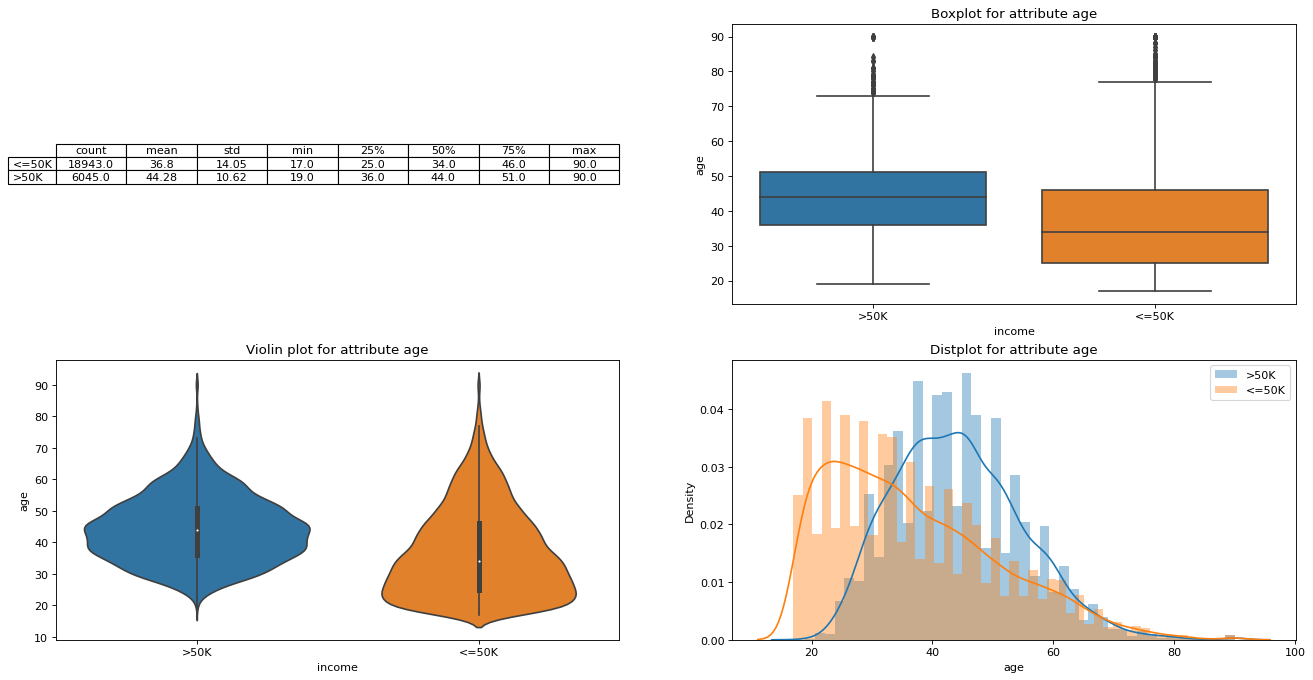

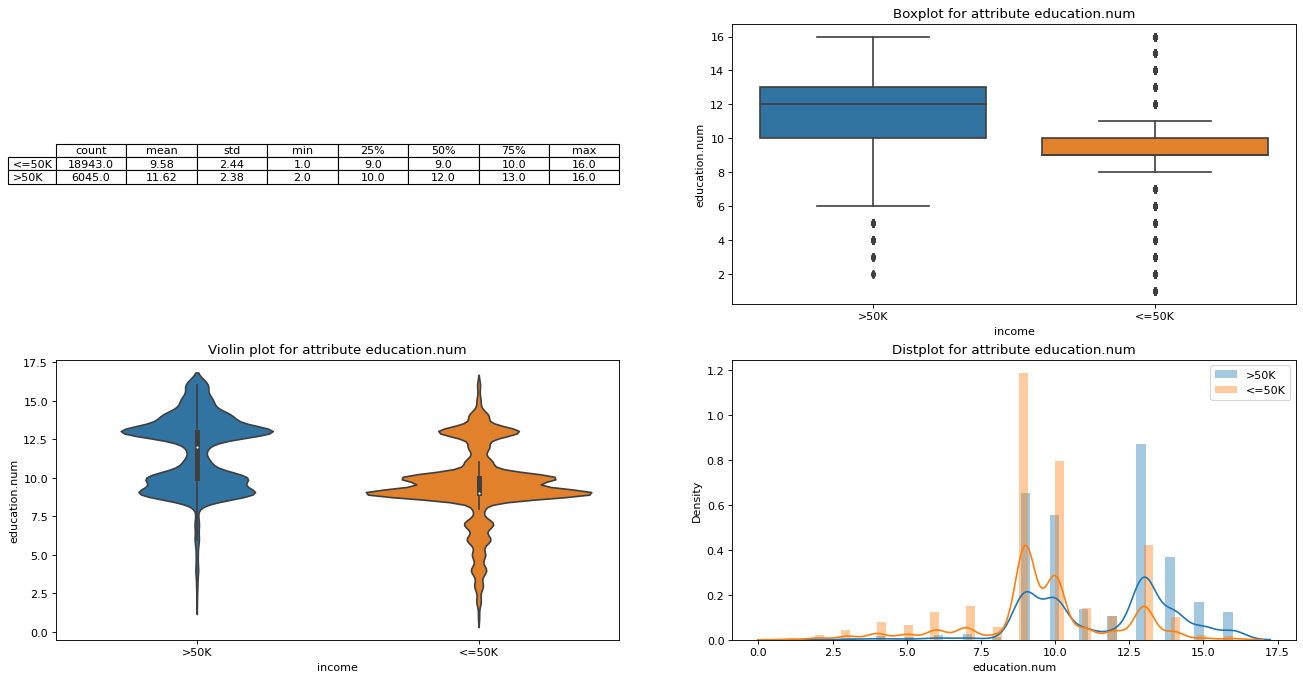

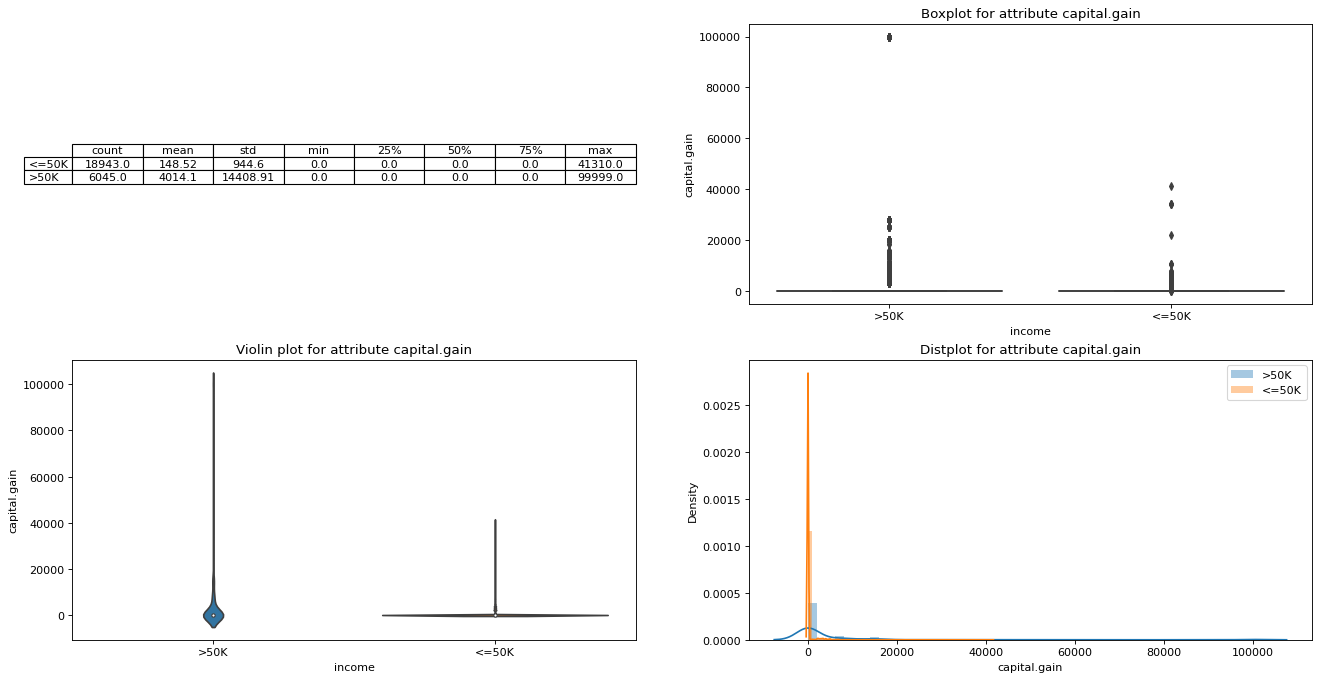

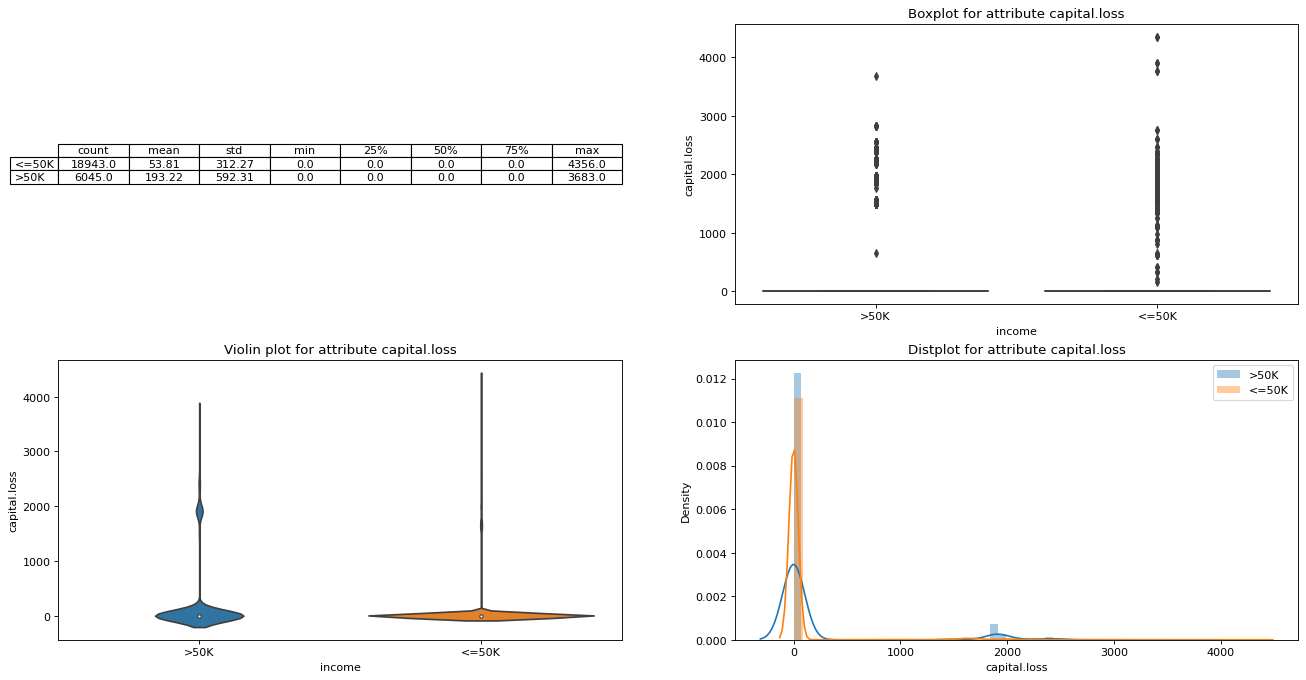

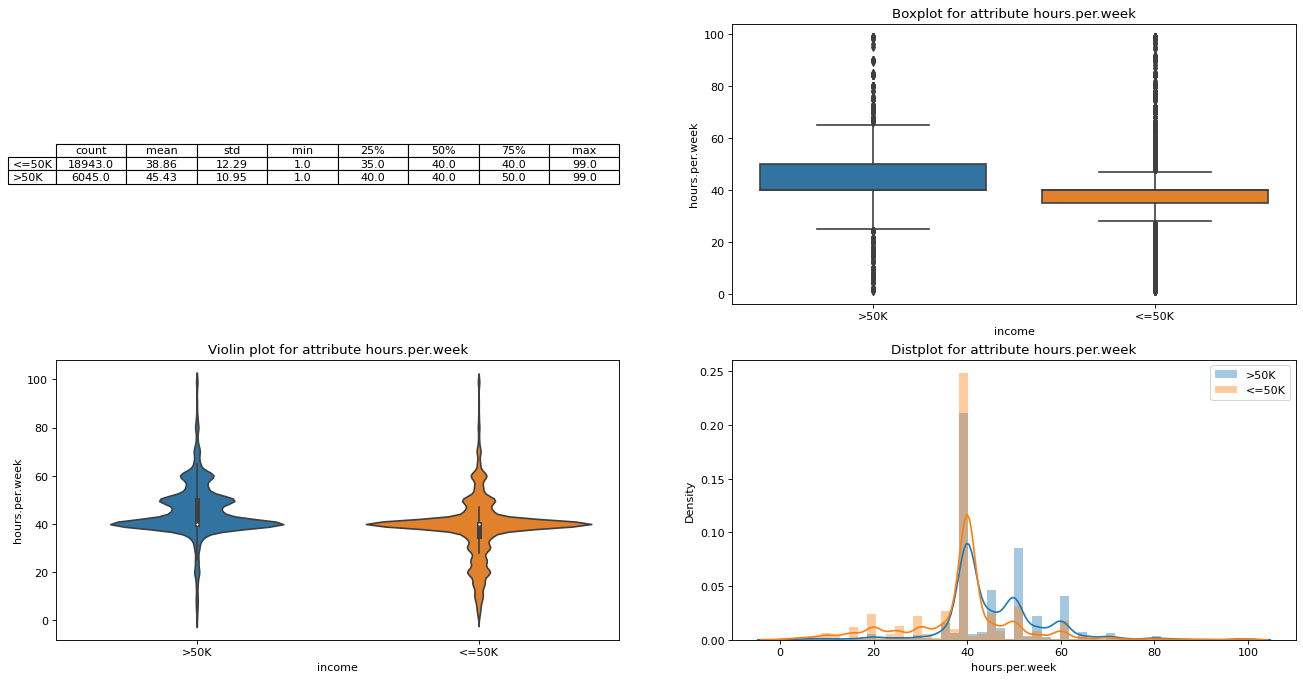

In [15]:
def describe_attribute(data, attribute):
    describe_info = data.groupby('income')[attribute].describe()
    unique_classes = data['income'].unique()

    plt.figure(figsize=(20, 10), dpi=80)
    gs = plt.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

    plt.subplot(gs[0])
    plt.axis('off')

    font_size = 10
    scale_factor = 1

    table = plt.table(cellText=describe_info.round(2).values, 
                      colLabels=describe_info.columns, 
                      rowLabels=describe_info.index, 
                      cellLoc='center', 
                      loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(scale_factor, scale_factor)

    plt.subplot(gs[1])
    sns.boxplot(data=data, x='income', y=attribute)
    plt.title(f'Boxplot for attribute {attribute}')

    plt.subplot(gs[2])
    sns.violinplot(data=data, x='income', y=attribute)
    plt.title(f'Violin plot for attribute {attribute}')

    plt.subplot(gs[3])
    for i in unique_classes:
        sns.distplot(data.loc[data.income == i, attribute], label=str(i))
    plt.title(f'Distplot for attribute {attribute}')
    plt.legend()

    plt.show()


numerical_attributes = df.select_dtypes(include=['int64', 'float64']).columns
for attr in numerical_attributes:
    describe_attribute(df, attr)


From the above visualization, it can be concluded that:

* The age attribute ranges from 17 to 90 years, with the upper value likely assigned to individuals above 90 years of age. Values above 70 years can be considered outliers for both classes. Young people, in the overwhelming majority, fall below the income threshold of 50 thousand, while middle-aged individuals often have incomes above this threshold.
* The education.num attribute, which numerically represents the level of education received, ranges from 1 to 16, with extreme values being very rare. In the group of individuals earning more, the average level of education is significantly higher, and values above the average level of education can be considered normal. On the other hand, in the group of lower earners, the number of people with secondary education is large enough that they occupy all positions between the first and third quartiles, causing other values to be mostly classified as outliers. On the income distribution, it is easy to notice that individuals with higher education are much more likely to be in the higher-income group.
* For the capital.gain and capital.loss attributes, again, it is difficult to observe dependencies based on their distribution, but by analyzing the arithmetic mean, one can conclude that in both cases, gain and loss, higher earners generally exhibit greater attribute values on average.
* For the hours per week attribute, both classes have similar average values around 40 hours, which corresponds to the median in both cases. However, it should be noted that higher earners work an average of a few more hours per week. Due to the concentration of most values around 40 hours per week, a significant portion of the variability range is considered outliers in both cases.

Summarizing all this information, it can be concluded that the best chance of being in the higher-income group is for an individual who is middle-aged, has a higher education, has significant capital gains, and works more than 40 hours per week. Conversely, a young person with below-average education, no capital gain or loss, and working less than 40 hours per week is more likely to be in the lower-income group.

### 1.2.3 Analysis of Symbolic Categorical Attributes

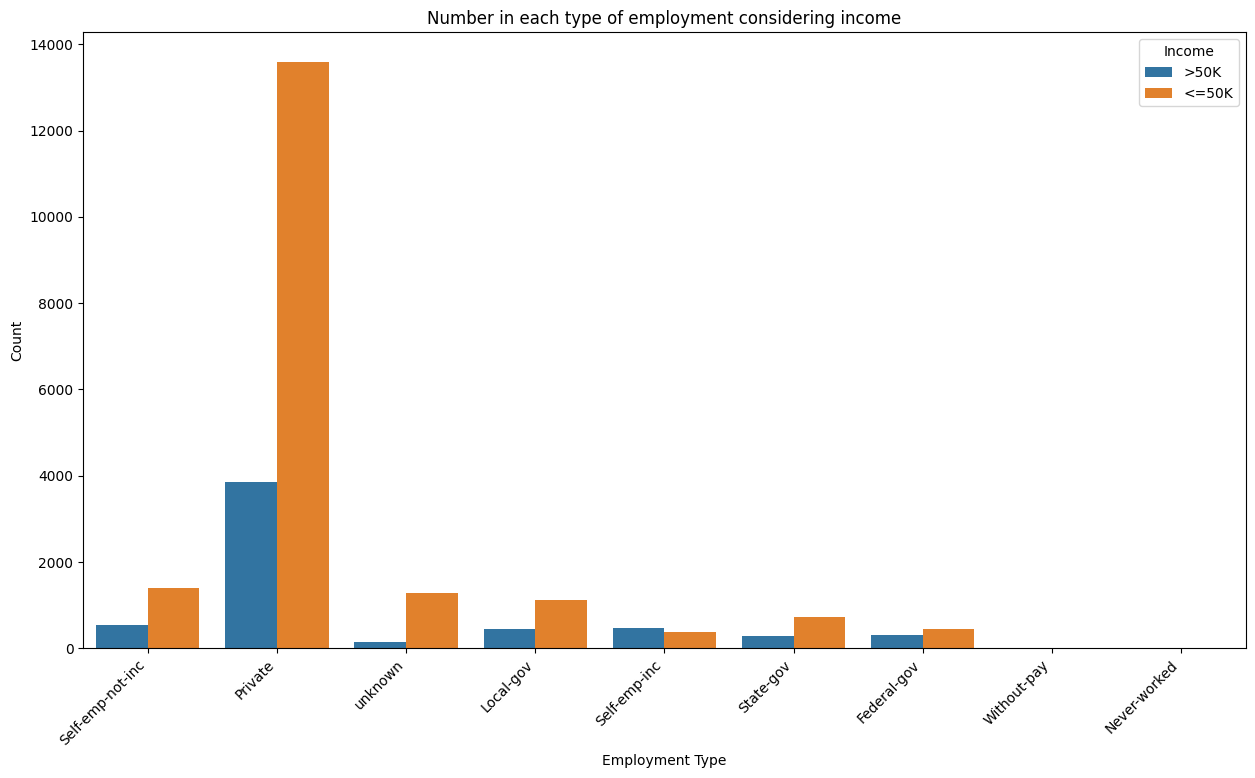

<Figure size 1500x800 with 0 Axes>

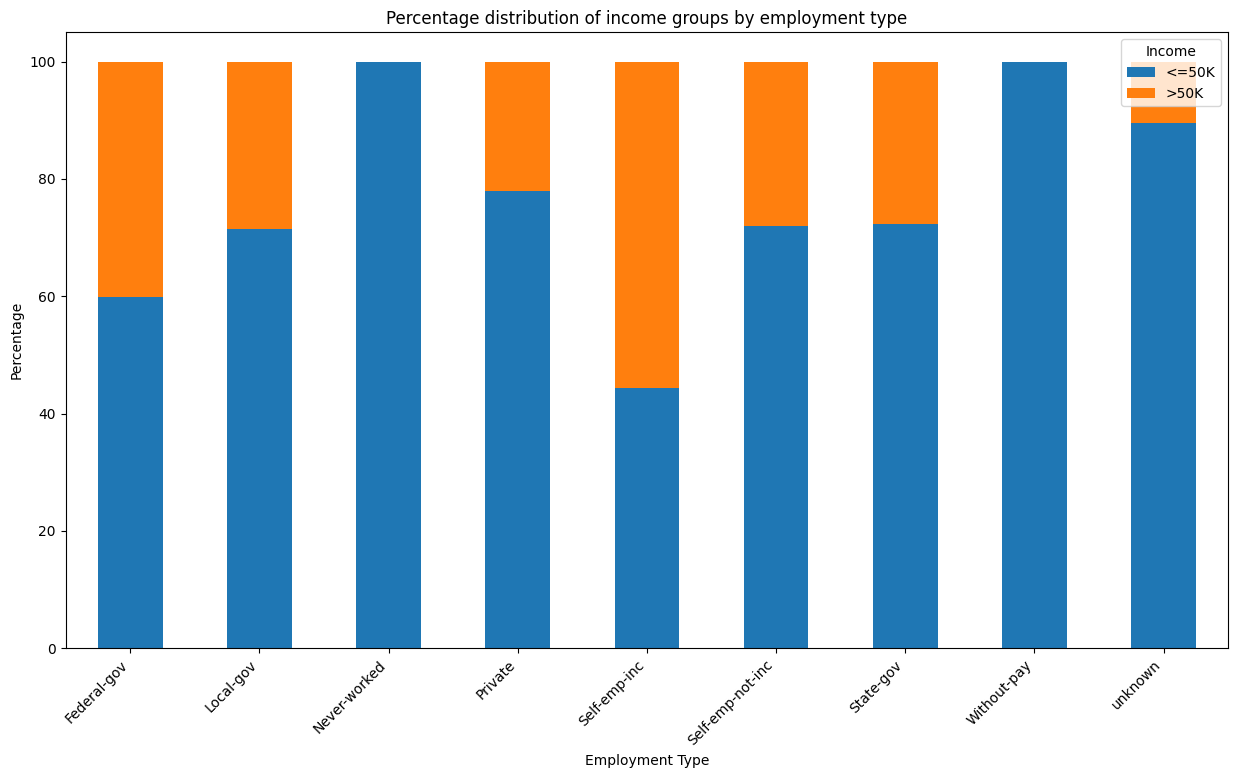

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Number in each type of employment considering income')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('workclass')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by employment type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()


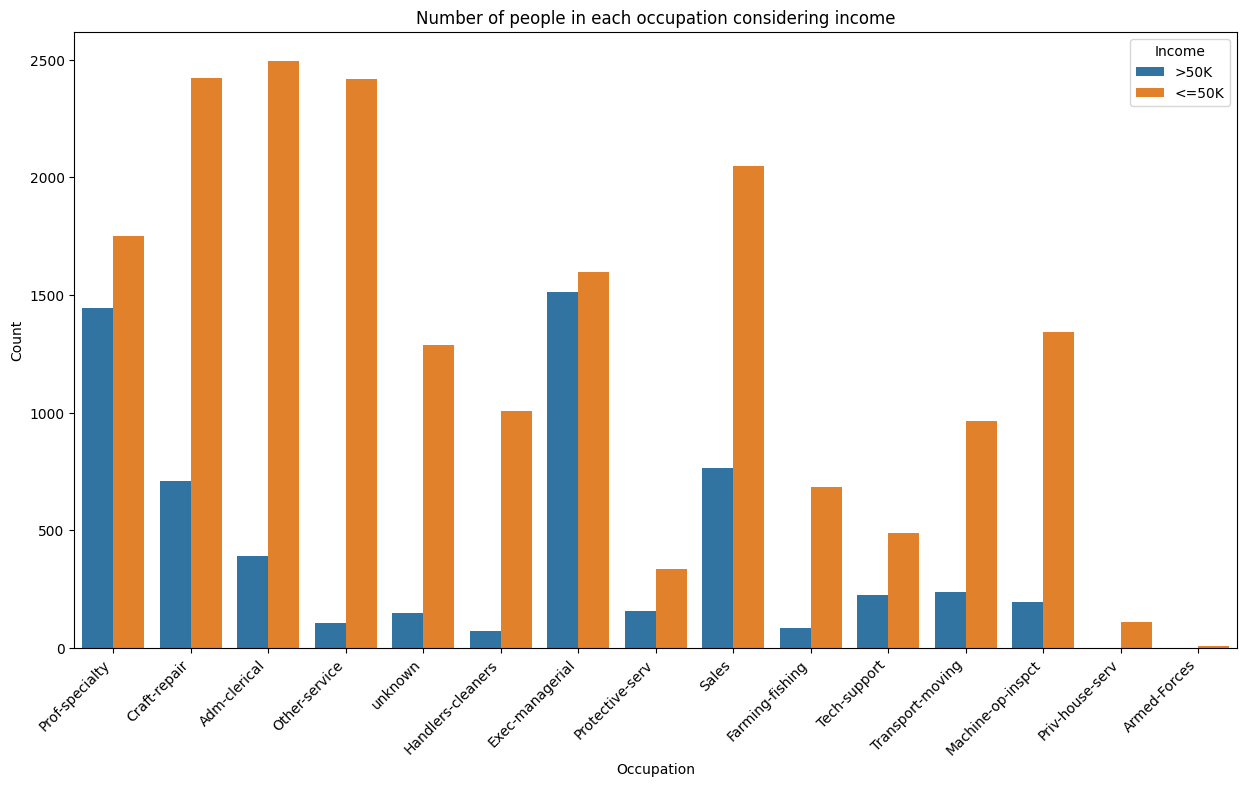

<Figure size 1500x800 with 0 Axes>

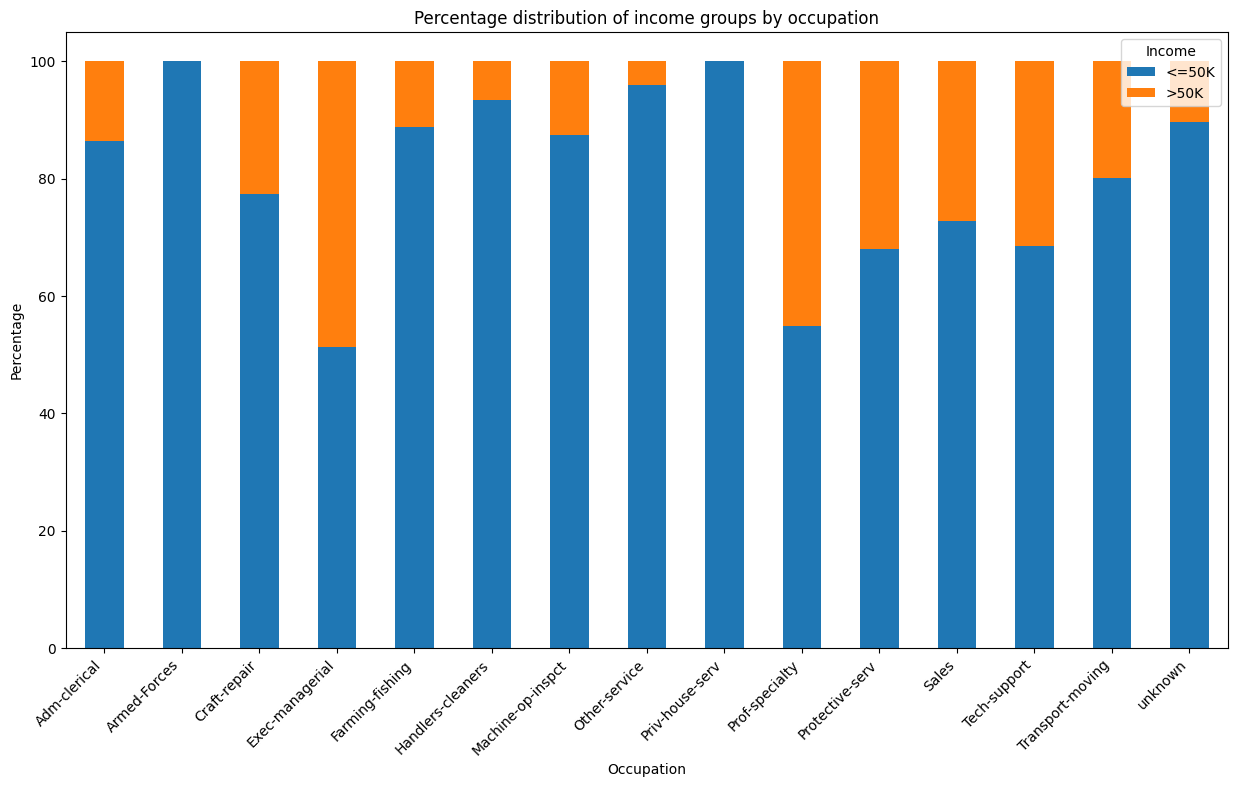

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Number of people in each occupation considering income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('occupation')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()


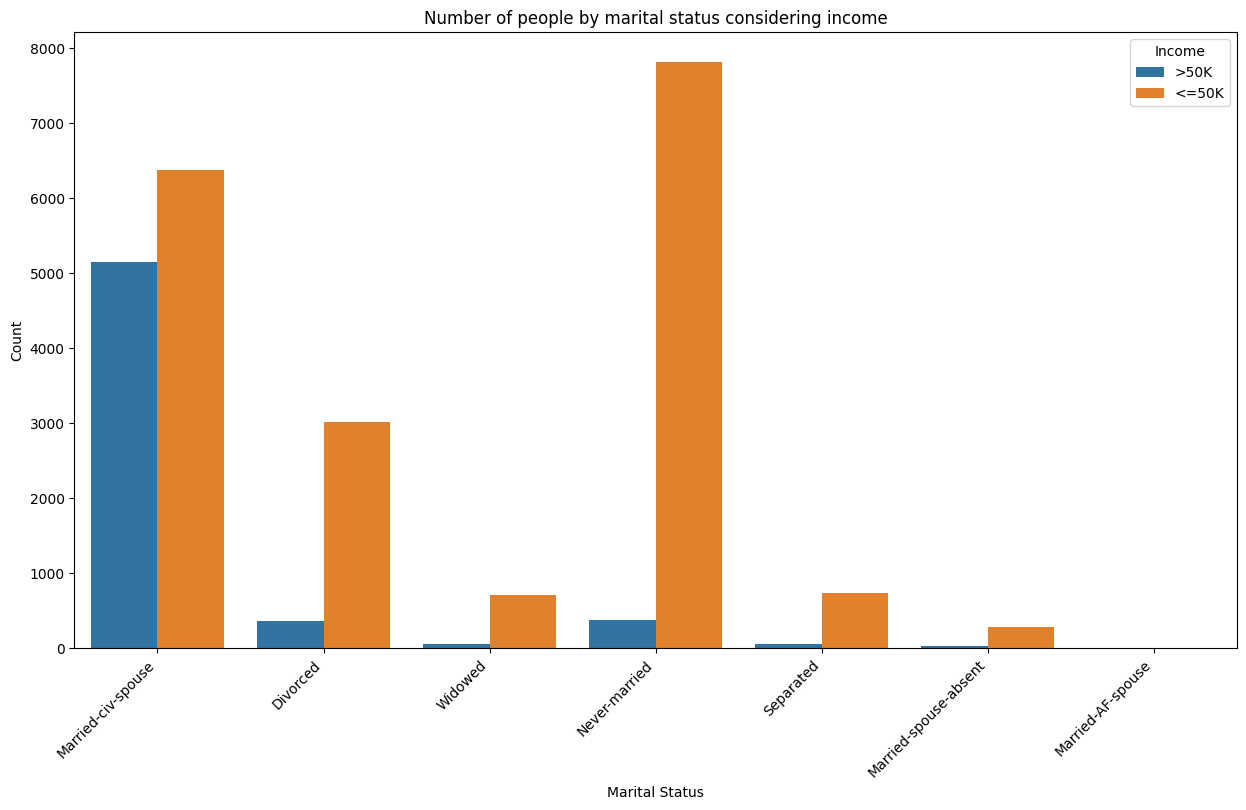

<Figure size 1500x800 with 0 Axes>

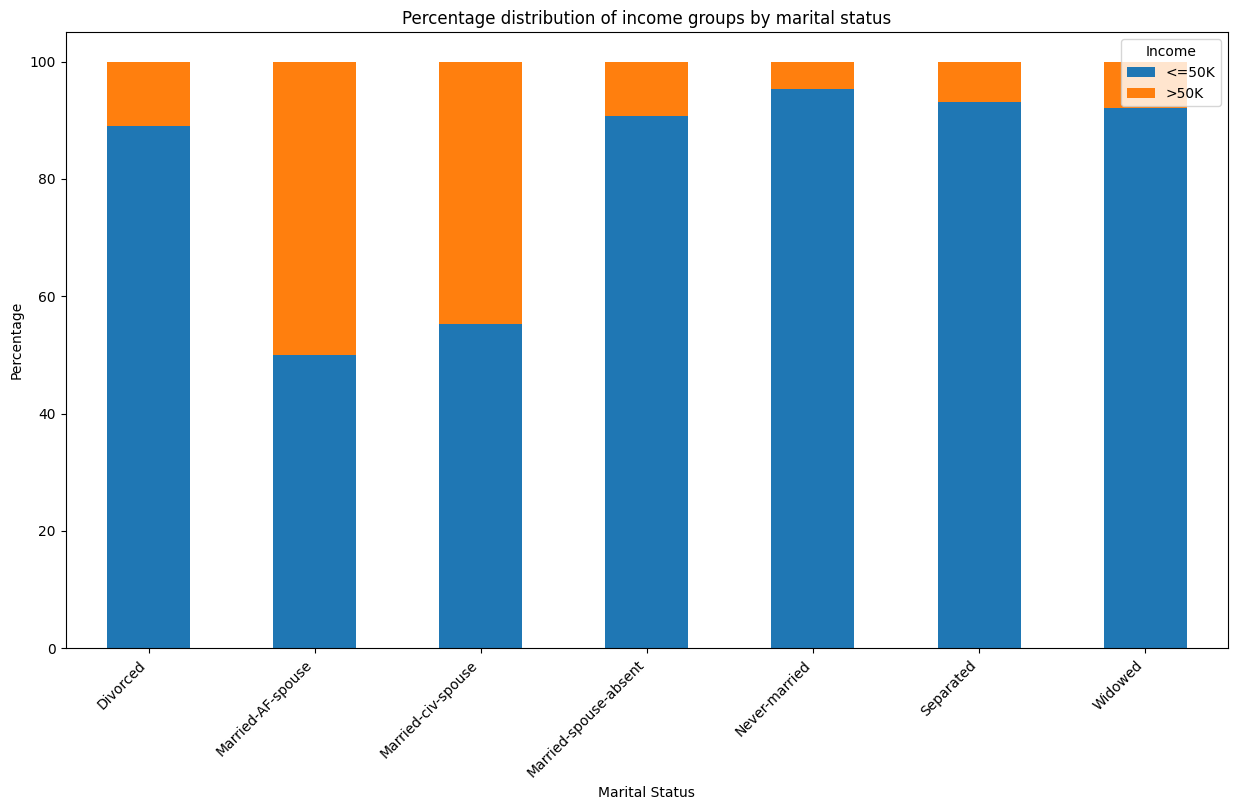

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='marital.status', hue='income')
plt.title('Number of people by marital status considering income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('marital.status')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by marital status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

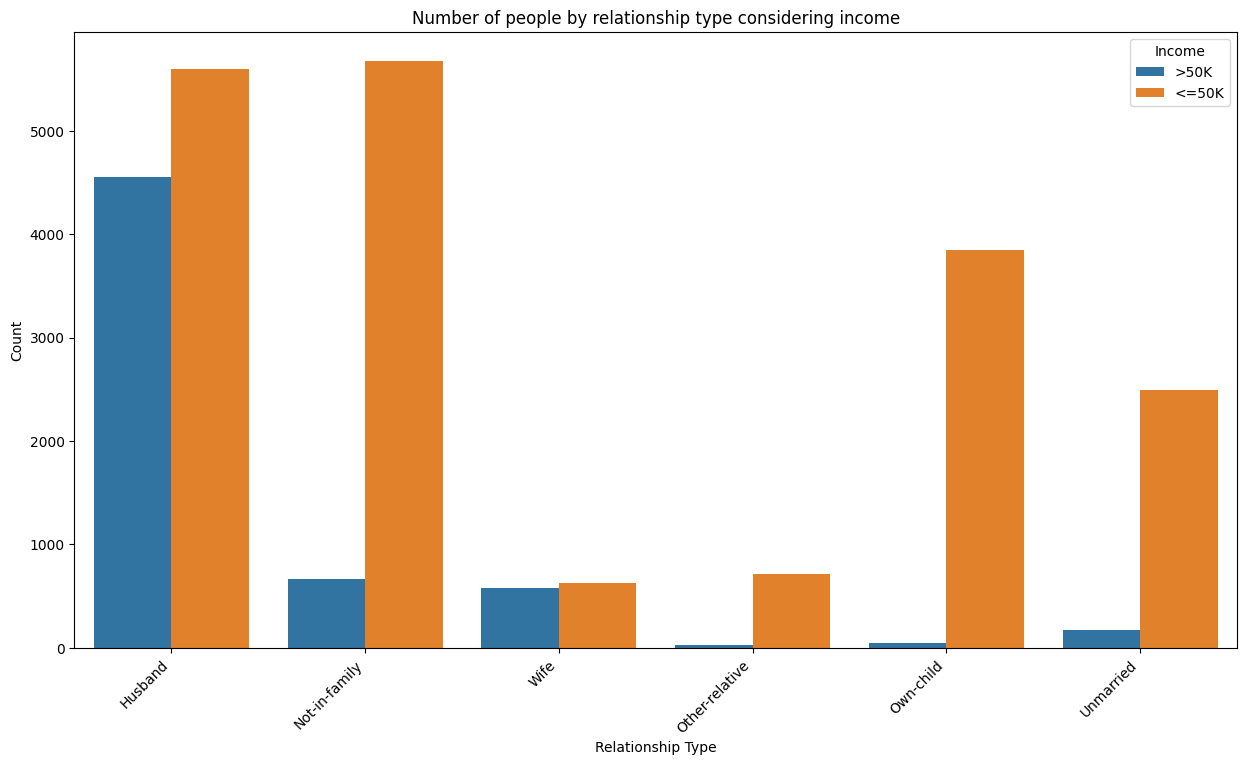

<Figure size 1500x800 with 0 Axes>

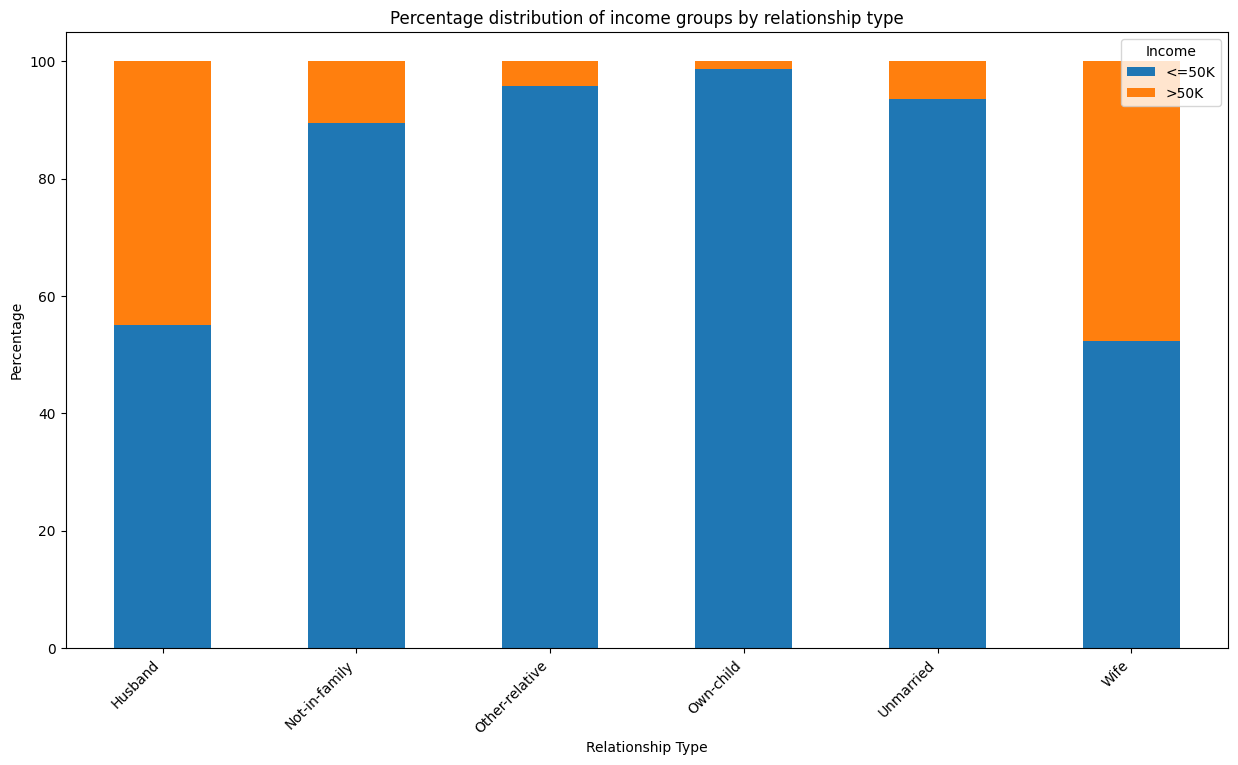

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Number of people by relationship type considering income')
plt.xlabel('Relationship Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('relationship')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by relationship type')
plt.xlabel('Relationship Type')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

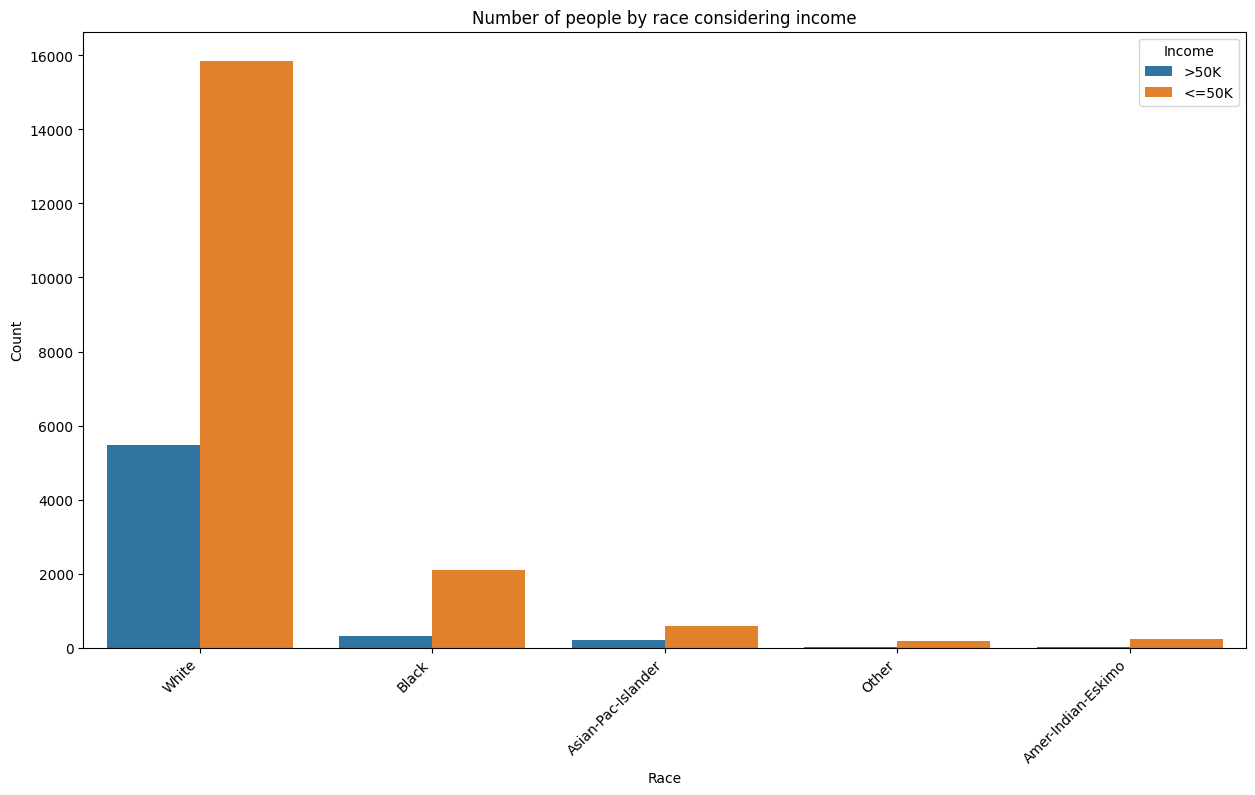

<Figure size 1500x800 with 0 Axes>

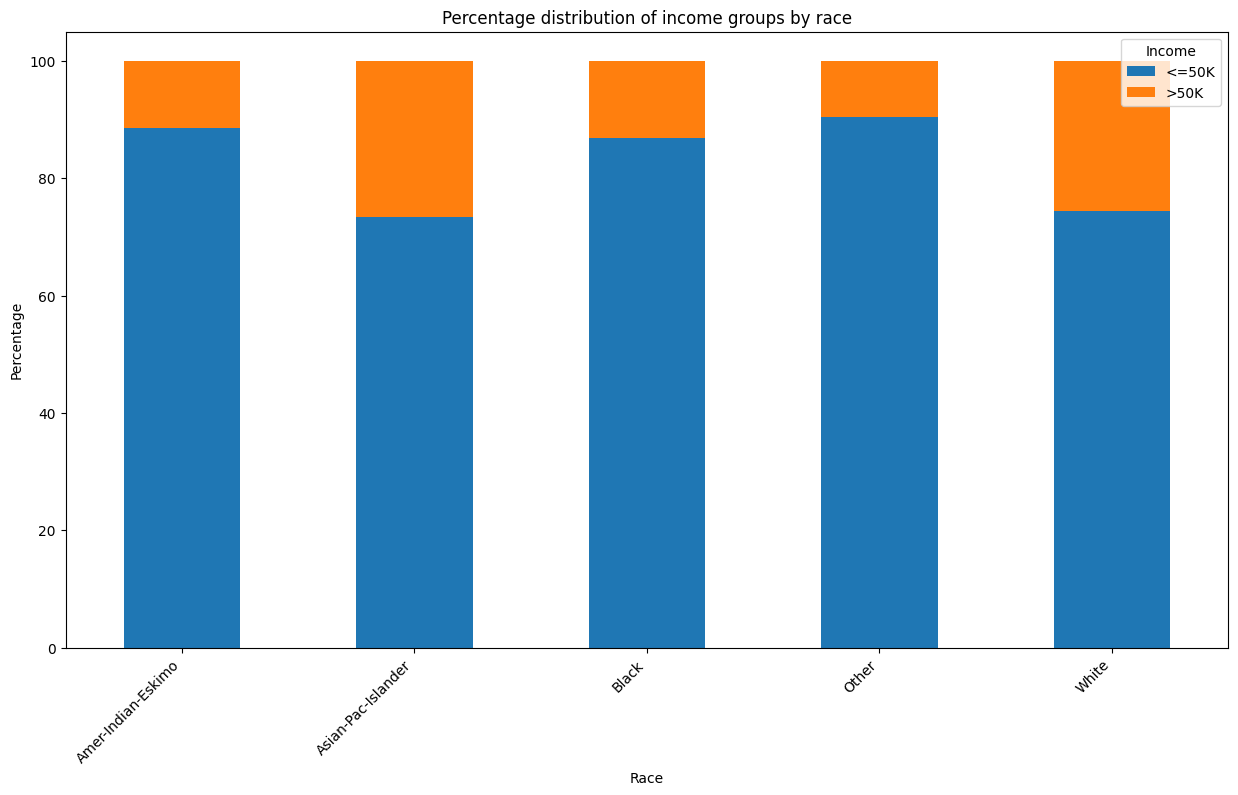

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='race', hue='income')
plt.title('Number of people by race considering income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('race')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

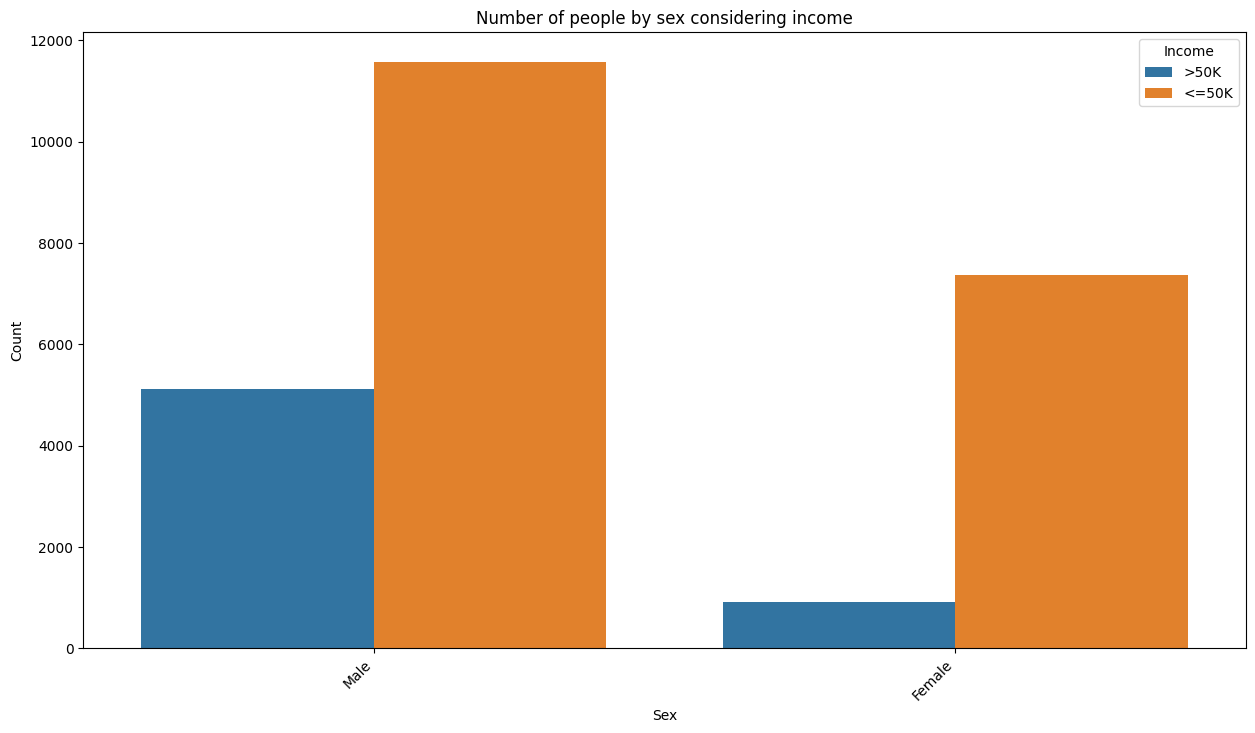

<Figure size 1500x800 with 0 Axes>

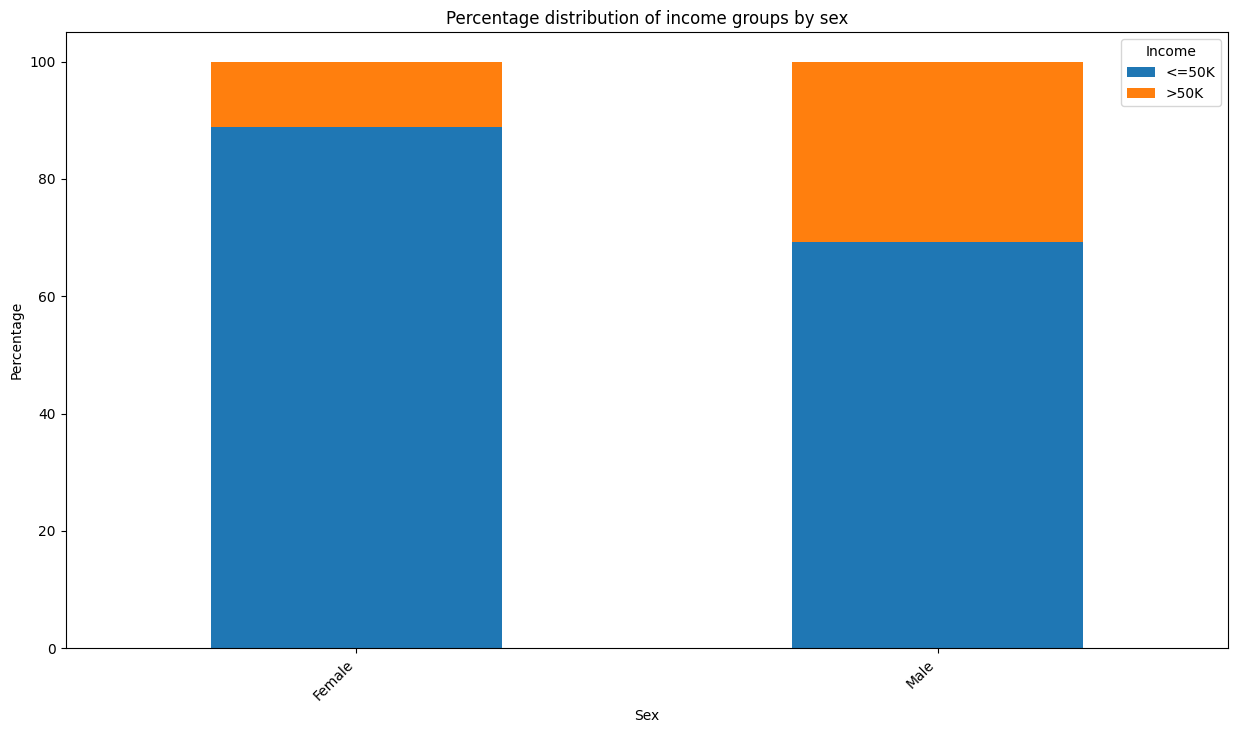

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Number of people by sex considering income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('sex')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

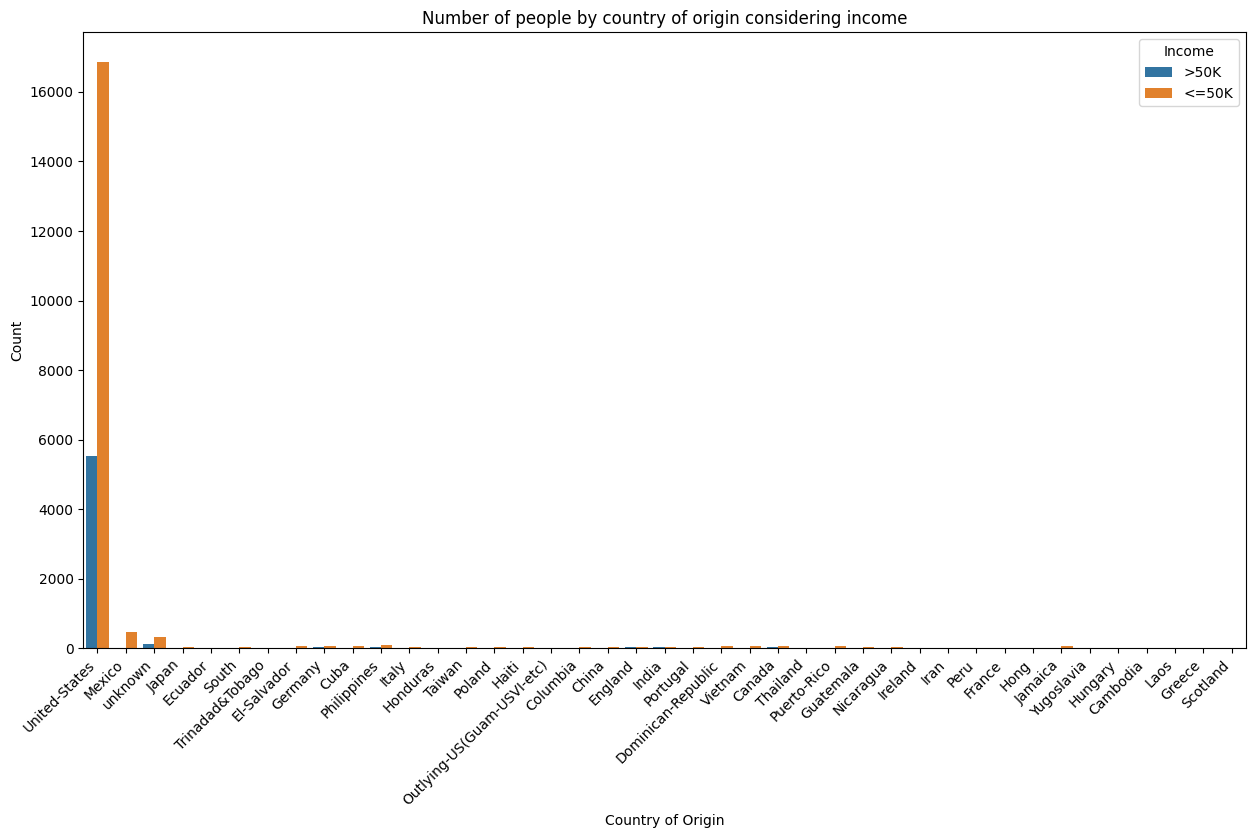

<Figure size 1500x800 with 0 Axes>

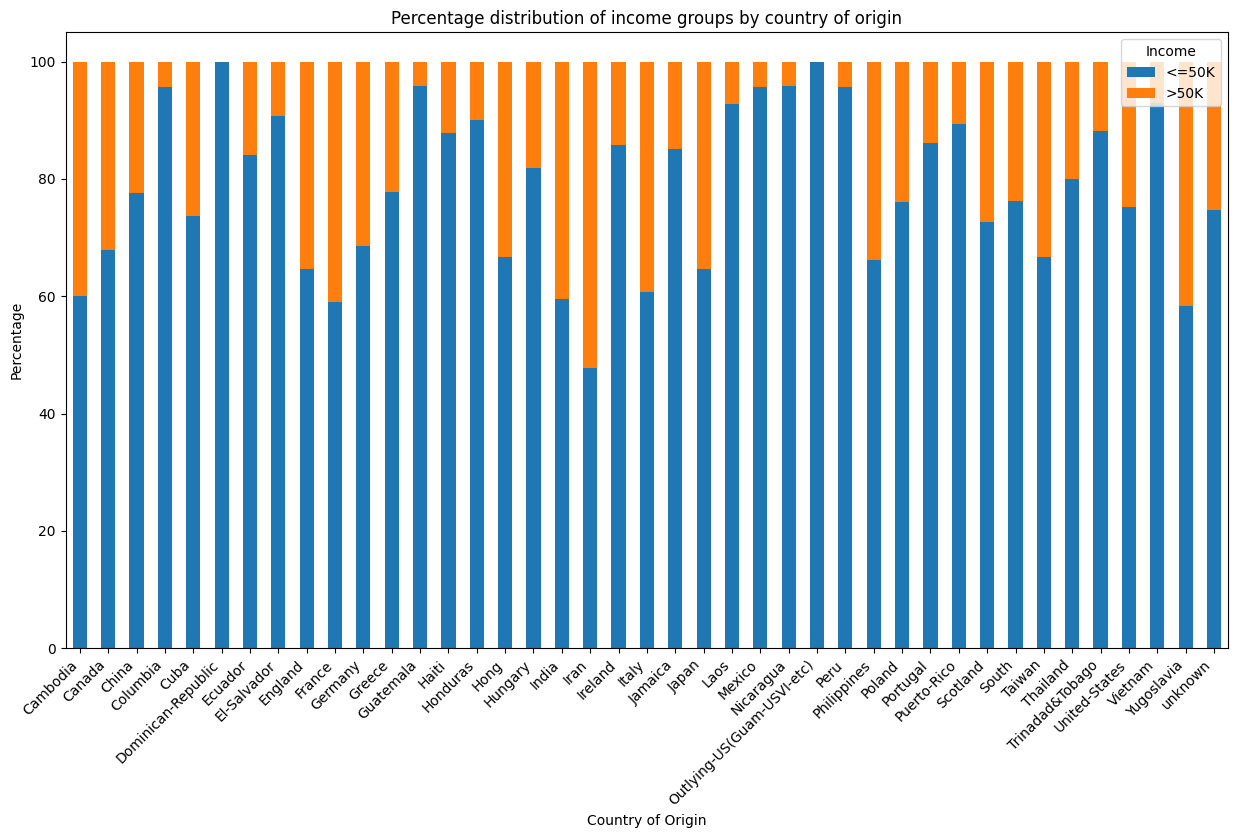

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='native.country', hue='income')
plt.title('Number of people by country of origin considering income')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='Income')
plt.show()

income_percentages = df.groupby('native.country')['income'].value_counts(normalize=True).unstack().multiply(100)
plt.figure(figsize=(15, 8))
income_percentages.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Percentage distribution of income groups by country of origin')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

From the above analysis, it can be concluded that:

* The largest number of people, both earning above and below \$50,000 annually, are employed in private companies (approximately 4,000 cases for those earning more and about 13,700 for those earning less). The percentage of those earning above the set amount is highest among the self-employed (around 60%), while those earning below are mostly among those who have never worked (almost 100%).
* The largest number of people earning above \$50,000 are employed as specialists and managers (in both cases, slightly less than 1,500 records), while the least are among those working in janitorial jobs and as farmers (both less than 100 records). The largest number of people earning below this amount is among lower-level office workers (about 2,500 cases), with the least being among those employed by the armed forces (less than 50 records). The highest percentage of people earning above \$50,000 annually is among managers (about 50%), while the largest percentage of those earning less is among contract workers in the armed forces (about 100%).
* The largest number of high earners is among those in marriages where both partners are civilians (married-civ-spouse; over 5,000 cases). The largest number of those earning below \$50,000 annually are among people who have never been married (about 7,800 records). The highest percentage of high earners is found among marriages where at least one spouse is employed by the armed forces and marriages where both partners are civilians (both around 50%). The lowest percentage is among people who have never been married (about 95%).
* Among the situations considered, the vast majority of people earning above \$50,000 annually are husbands (around 4,500 records). The largest number of those earning below this amount is among husbands and those without families (both more than 5,500 cases). The highest percentage of those earning above \$50,000 annually is among wives and husbands (about 50%), with the lowest percentage among those in the own-child category (close to 100%).
* Among the groups considered, the highest number of people earning both below and above \$50,000 is of white race (approximately 5,500 and 16,000 cases, respectively). The highest percentage of high earners is among white people and those of East Asian descent (around 30%). The largest number of people earning below this threshold is among Native Americans and others (in both cases, close to 90%).
* When considering gender, men dominate over women among those earning both above and below \$50,000 annually (approximately 5,500 and 11,500 cases, respectively). The percentage of men earning more is also higher—about 25%, while only about 15% of women have similar earnings.
* The largest number of individuals in both categories comes from the United States (around 5,700 cases for those earning more and 16,500 for those earning less). The highest percentage of those earning above \$50,000 annually is of Iranian origin (about 50%), while the lowest is among those from unincorporated U.S. territories and the Dominican Republic (close to 100% in both cases).

Based on the presented analysis, it can be concluded that the highest probability of earning above \$50,000 annually is for self-employed white managers of Iranian origin, whose wives are employed by the armed forces. Conversely, the highest probability of earning below this threshold is for women who have never worked, originating from unincorporated U.S. territories or the Dominican Republic, who are Native American and have never been married.

# 2 Supervised Learning

## 2.1 Dataset preparation

For supervised learning, we will use two functions - "split" and "verify." The first one splits the dataset into a training subset and a testing subset, while the "verify" function trains the model and checks its performance, then displays the confusion matrix.

In [23]:
def split(df, proportion):
    training_set, test_set, training_labels, test_labels = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1].astype('category').cat.codes, test_size=proportion)  # , random_state=0)
    return {"training_set": training_set, "test_set": test_set, "training_labels": training_labels, "test_labels": test_labels}

def verify(model, training_data, test_data, attributes):
    X_train = np.ascontiguousarray(training_data.iloc[:, :-1])
    X_test = np.ascontiguousarray(test_data.iloc[:, :-1])
    y_train = np.ascontiguousarray(training_data.iloc[:, -1])
    y_test = np.ascontiguousarray(test_data.iloc[:, -1])

    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    cm = confusion_matrix(y_train, train_predictions)
    train_accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print("Confusion matrix - training set, accuracy:", train_accuracy)
    print("Score - training set:", model.score(X_train, y_train))
    print(cm)

    cm = confusion_matrix(y_test, test_predictions)
    test_accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print("Confusion matrix - test set, accuracy:", test_accuracy)
    print("Score - test set:", model.score(X_test, y_test))
    print(cm)

In supervised learning, it is necessary to convert categorical attributes into numerical values. For this purpose, we used the LabelEncoder function from the sklearn library. As seen, each categorical attribute was assigned a numerical value. Additionally, before starting the learning process, we discard one attribute that corresponds to the level of education. In further analysis, we exclude the "education" attribute and only consider the "education.num" attribute.

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_coded = df.copy()

encoder = LabelEncoder()

for column in categorical_columns:
    df_coded[column] = encoder.fit_transform(df_coded[column])
dane = df_coded.copy()

dane['income'] = encoder.fit_transform(df_coded['income'])

dane = dane.drop(columns = 'education', axis = 1)

print(dane.info())
dane.head()

<class 'pandas.core.frame.DataFrame'>
Index: 24988 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             24988 non-null  int64
 1   workclass       24988 non-null  int64
 2   education.num   24988 non-null  int64
 3   marital.status  24988 non-null  int64
 4   occupation      24988 non-null  int64
 5   relationship    24988 non-null  int64
 6   race            24988 non-null  int64
 7   sex             24988 non-null  int64
 8   capital.gain    24988 non-null  int64
 9   capital.loss    24988 non-null  int64
 10  hours.per.week  24988 non-null  int64
 11  native.country  24988 non-null  int64
 12  income          24988 non-null  int64
dtypes: int64(13)
memory usage: 2.7 MB
None


,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,5,15,2,9,0,4,1,99999,0,70,37,1
1,30,3,9,0,2,1,4,0,0,0,40,37,0
2,46,3,10,2,0,0,4,1,0,0,40,37,1
3,32,3,11,2,7,0,4,1,0,0,60,37,1
4,54,8,1,2,14,5,4,0,0,0,40,24,0


After encoding the attributes, we can proceed to split the data into a training set and a test set. In this case, due to the large amount of data, we decided to split the dataset in a 1:9 ratio. The code responsible for this is commented out, as the assumption is that we only split the data once and save the resulting split to files. We then read the saved data from the files and check the number of objects in each set.

In [25]:
split_data = split(dane,0.1)
train = pd.concat([split_data['training_set'], split_data['training_labels']], axis=1)
test = pd.concat([split_data['test_set'], split_data['test_labels']], axis=1)
print('Number of objects in train set: ', len(train))
print('Number of objects in test set: ', len(test))

atr_list = list(range(dane.shape[1]-1))

Number of objects in train set:  22489
Number of objects in test set:  2499


## 2.2 Basic Classifiers

First, we checked how classification performs using basic classifiers, namely k-nearest neighbors and nearest centroid.

Confusion matrix - training set, accuracy: 0.9765663213126418
Score - training set: 0.9765663213126418
[[16822   251]
 [  276  5140]]
Confusion matrix - test set, accuracy: 0.8171268507402961
Score - test set: 0.8171268507402961
[[1637  233]
 [ 224  405]]
Confusion matrix - training set, accuracy: 0.9088443238916804
Score - training set: 0.9088443238916804
[[17044    29]
 [ 2021  3395]]
Confusion matrix - test set, accuracy: 0.8371348539415766
Score - test set: 0.8371348539415766
[[1770  100]
 [ 307  322]]
Confusion matrix - training set, accuracy: 0.9060874205166971
Score - training set: 0.9060874205166971
[[16209   864]
 [ 1248  4168]]
Confusion matrix - test set, accuracy: 0.8355342136854742
Score - test set: 0.8355342136854742
[[1679  191]
 [ 220  409]]
Confusion matrix - training set, accuracy: 0.8933256258615323
Score - training set: 0.8933256258615323
[[16665   408]
 [ 1991  3425]]
Confusion matrix - test set, accuracy: 0.8407362945178071
Score - test set: 0.8407362945178071
[[1

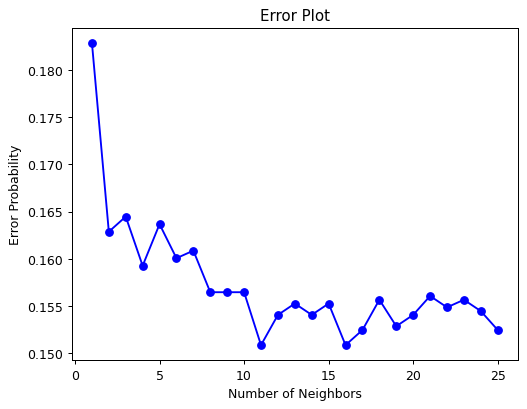

In [26]:
kvals = range(1, 26)
rss_all = np.zeros(25)

for k in kvals:
    X_train = np.ascontiguousarray(train.iloc[:, :-1])
    X_test = np.ascontiguousarray(test.iloc[:, :-1])
    y_train = np.ascontiguousarray(train.iloc[:, -1])
    y_test = np.ascontiguousarray(test.iloc[:, -1])

    model = KNeighborsClassifier(n_neighbors=k)
    verify(model,train, test,atr_list)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rss_all[k-1] = 1 - model.score(X_test, y_test)

plt.figure(dpi=90)
plt.plot(kvals, rss_all, 'bo-')
plt.title('Error Plot')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Probability')
plt.show()

The nearest neighbor classifier performs reasonably well, achieving an accuracy of about 84%, although classifying the less frequent class is often unsatisfactory, with nearly half of the objects being incorrectly assigned to the more frequent class. As seen in the error plot, increasing the number of neighbors analyzed improves the results up to a certain point, after which further increases no longer make sense. According to theoretical assumptions, this is a classification method that takes the most time.

In [27]:
model = NearestCentroid()

verify(model,train, test,atr_list)

Confusion matrix - training set, accuracy: 0.7844724087331585
Score - training set: 0.7844724087331585
[[16466   607]
 [ 4240  1176]]
Confusion matrix - test set, accuracy: 0.7767106842737095
Score - test set: 0.7767106842737095
[[1803   67]
 [ 491  138]]


The nearest centroid classifier is definitely not suitable for classifying the analyzed dataset. The result of about 77% is very close to what could be achieved by assigning everything to the more frequent class. Additionally, the majority of objects from the less frequent class are misclassified.

## 2.3 Naive Bayes Classifier

Among the many available naive Bayes classifiers, we decided to compare two: the categorical and the Gaussian distribution-based model. As seen below, the categorical model performed significantly better, achieving an accuracy above 85%, which is nearly 6 percentage points higher than the model using the normal distribution. It is worth noting that the categorical model correctly classified the majority of objects in both classes (about 35% of the ">50.000" class objects were misclassified, which is the best result among all the classifiers we tested). The Gaussian distribution model, on the other hand, misclassified the vast majority of ">50.000" objects.

In [28]:
model = CategoricalNB()

print("Categorical")
verify(model,train,test,atr_list)

model = GaussianNB()

print("Gaussia")
verify(model,train,test,atr_list)

Categorical
Confusion matrix - training set, accuracy: 0.8585975365734358
Score - training set: 0.8585975365734358
[[15790  1283]
 [ 1897  3519]]
Confusion matrix - test set, accuracy: 0.8551420568227291
Score - test set: 0.8551420568227291
[[1741  129]
 [ 233  396]]
Gaussia
Confusion matrix - training set, accuracy: 0.7992351816443595
Score - training set: 0.7992351816443595
[[16247   826]
 [ 3689  1727]]
Confusion matrix - test set, accuracy: 0.7979191676670668
Score - test set: 0.7979191676670668
[[1785   85]
 [ 420  209]]


## 2.4 Decision Trees and Random Forests

In order to classify, we decided to use, among others, the random forest method. To illustrate the difference between a forest and a single tree, we constructed a graph that shows the percentage of misclassified elements depending on the depth of the tree.

Confusion matrix - training set, accuracy: 0.8525056694383921
Score - training set: 0.8525056694383921
[[16124   949]
 [ 2368  3048]]
Confusion matrix - test set, accuracy: 0.8423369347739096
Score - test set: 0.8423369347739096
[[1761  109]
 [ 285  344]]
Confusion matrix - training set, accuracy: 0.856818889234737
Score - training set: 0.856818889234737
[[16326   747]
 [ 2473  2943]]
Confusion matrix - test set, accuracy: 0.8419367747098839
Score - test set: 0.8419367747098839
[[1777   93]
 [ 302  327]]
Confusion matrix - training set, accuracy: 0.8595757926097203
Score - training set: 0.8595757926097203
[[16263   810]
 [ 2348  3068]]
Confusion matrix - test set, accuracy: 0.8455382152861144
Score - test set: 0.8455382152861144
[[1768  102]
 [ 284  345]]
Confusion matrix - training set, accuracy: 0.8639779447730002
Score - training set: 0.8639779447730002
[[16293   780]
 [ 2279  3137]]
Confusion matrix - test set, accuracy: 0.8471388555422169
Score - test set: 0.8471388555422169
[[176

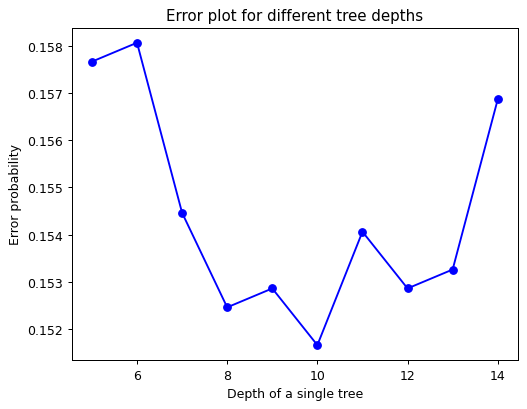

In [29]:
kvals = range(5, 15)
error_all = np.zeros(len(kvals))
    
for i, k in enumerate(kvals): 
    X_train = np.ascontiguousarray(train.iloc[:, :-1])
    X_test = np.ascontiguousarray(test.iloc[:, :-1])
    y_train = np.ascontiguousarray(train.iloc[:, -1])
    y_test = np.ascontiguousarray(test.iloc[:, -1])

    model = tree.DecisionTreeClassifier(max_depth=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error_all[i] = 1 - model.score(X_test, y_test)
    verify(model,train,test,atr_list)

plt.figure(dpi=90)
plt.plot(kvals, error_all, 'bo-')
plt.title('Error plot for different tree depths')
plt.xlabel('Depth of a single tree')
plt.ylabel('Error probability')
plt.show()

As seen in the plot above, the best classification results (85.4%) are achieved for a tree depth of 11 levels. This aligns with theoretical assumptions, which state that the depth of the tree should range from 10 to around 15 levels, depending on the data. As expected, the worst results (84.4%) occur for a tree with a relatively small number of levels. It is worth noting, however, that the percentage range between the worst and best classification results is very small—only 1%, which suggests that the tool used is well-suited for our dataset (for comparison, the centroid method resulted in a classification score almost 10% worse than the best decision tree scenario). For all depths, more than half of the objects were assigned to the correct class. In the case of objects with the decision attribute ">50,000", around 40% of test cases were misclassified.

Now, we will try different combinations of tree depths for a random forest consisting of 80 trees. The number 80 was chosen because it is one of the lowest recommended values for such a large dataset. This allows for relatively fast classification and chart creation. For all random forest cases, we will use seed 42 to ensure more predictable results for the given data split.

Confusion matrix - training set, accuracy: 0.8535728578416114
Score - training set: 0.8535728578416114
[[16452   621]
 [ 2672  2744]]
Confusion matrix - test set, accuracy: 0.8455382152861144
Score - test set: 0.8455382152861144
[[1801   69]
 [ 317  312]]
Confusion matrix - training set, accuracy: 0.8560184979323224
Score - training set: 0.8560184979323224
[[16401   672]
 [ 2566  2850]]
Confusion matrix - test set, accuracy: 0.8475390156062425
Score - test set: 0.8475390156062425
[[1796   74]
 [ 307  322]]
Confusion matrix - training set, accuracy: 0.8593089955089155
Score - training set: 0.8593089955089155
[[16406   667]
 [ 2497  2919]]
Confusion matrix - test set, accuracy: 0.8507402961184474
Score - test set: 0.8507402961184474
[[1795   75]
 [ 298  331]]
Confusion matrix - training set, accuracy: 0.8621992974343012
Score - training set: 0.8621992974343012
[[16387   686]
 [ 2413  3003]]
Confusion matrix - test set, accuracy: 0.849139655862345
Score - test set: 0.849139655862345
[[178

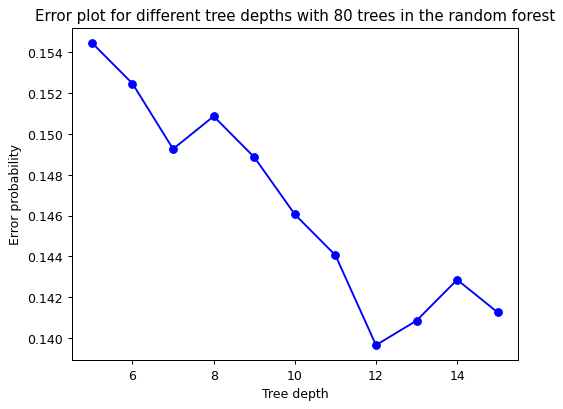

In [30]:
kvals = range(5, 16)
error_all = np.zeros(len(kvals))

for i, k in enumerate(kvals): 
    X_train = np.ascontiguousarray(train.iloc[:, :-1])
    X_test = np.ascontiguousarray(test.iloc[:, :-1])
    y_train = np.ascontiguousarray(train.iloc[:, -1])
    y_test = np.ascontiguousarray(test.iloc[:, -1])

    model = RandomForestClassifier(n_estimators=80, max_depth=k, random_state=42,bootstrap=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error_all[i] = 1 - model.score(X_test, y_test)
    verify(model,train,test,atr_list)

plt.figure(dpi=90)
plt.plot(kvals, error_all, 'bo-')
plt.title('Error plot for different tree depths with 80 trees in the random forest')
plt.xlabel('Tree depth')
plt.ylabel('Error probability')
plt.show()


As shown in the above chart, in the best case, the classification achieves an accuracy of 85.8%, which is a marginally better result than classification using a single tree. The optimal depth is also slightly different — instead of 11 levels for a tree, in this case, it is 14, which is within the theoretical range. Overall, as can be seen from the chart, until a certain point, an increase in the number of levels is almost directly proportional to an increase in accuracy (from 84.3% to approximately 86%); beyond this point, the trend starts to reverse. Similar to the previous case, the range of results is relatively small — only 1.5%. Notably, in none of the iterations did the number of misclassified elements exceed the number of correctly classified ones, but for the initial cases, nearly 50% of the objects were misclassified. As the number of trees increased, this ratio gradually decreased, with the final iterations showing around 40% of the test cases being misclassified.

Now, we will check how the classification results look for different numbers of trees in the random forest. Again, the depth of the examined trees (10) was chosen to minimize classification time.

Confusion matrix - training set, accuracy: 0.8734937080350393
Score - training set: 0.8734937080350393
[[16441   632]
 [ 2213  3203]]
Confusion matrix - test set, accuracy: 0.8563425370148059
Score - test set: 0.8563425370148059
[[1791   79]
 [ 280  349]]
Confusion matrix - training set, accuracy: 0.8730490462003646
Score - training set: 0.8730490462003646
[[16443   630]
 [ 2225  3191]]
Confusion matrix - test set, accuracy: 0.8563425370148059
Score - test set: 0.8563425370148059
[[1793   77]
 [ 282  347]]
Confusion matrix - training set, accuracy: 0.8731379785672996
Score - training set: 0.8731379785672996
[[16435   638]
 [ 2215  3201]]
Confusion matrix - test set, accuracy: 0.8563425370148059
Score - test set: 0.8563425370148059
[[1791   79]
 [ 280  349]]
Confusion matrix - training set, accuracy: 0.8733603094846369
Score - training set: 0.8733603094846369
[[16437   636]
 [ 2212  3204]]
Confusion matrix - test set, accuracy: 0.8559423769507803
Score - test set: 0.8559423769507803
[[1

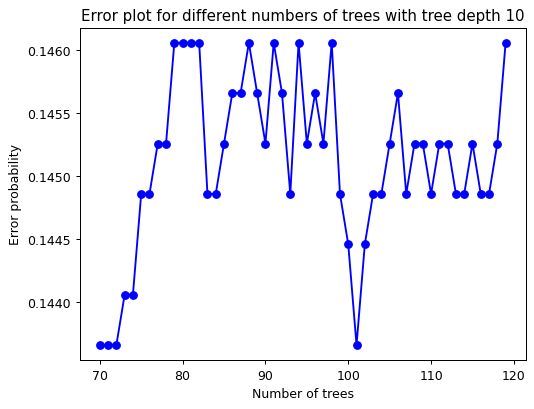

In [31]:
kvals = range(70,120)
error_all = np.zeros(len(kvals))

for i, k in enumerate(kvals): 
    X_train = np.ascontiguousarray(train.iloc[:, :-1])
    X_test = np.ascontiguousarray(test.iloc[:, :-1])
    y_train = np.ascontiguousarray(train.iloc[:, -1])
    y_test = np.ascontiguousarray(test.iloc[:, -1])

    model = RandomForestClassifier(n_estimators=k, max_depth=10, random_state=42,bootstrap=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error_all[i] = 1 - model.score(X_test, y_test)
    verify(model,train,test,atr_list)

plt.figure(dpi=90)
plt.plot(kvals, error_all, 'bo-')
plt.title('Error plot for different numbers of trees with tree depth 10')
plt.xlabel('Number of trees')
plt.ylabel('Error probability')
plt.show()

As seen in the chart above, in the best case, the classification accuracy is 85.5%, which is a result slightly worse than the one achieved when testing different tree depths (the difference between them is only 0.3%). Analyzing the chart, no specific trend can be identified, but an important observation is the minimal range between the best and worst classification results – it amounts to about 0.25%, which is much smaller than in the two previous analyses for different tree depths. This allows us to conclude that, for our data, the number of trees is a less significant factor than the depth of the tree. Similar to the two previous classifiers, in this example, for each iteration, over 50% of the objects were correctly identified; for objects with the decision attribute ">50.000", in each iteration, about 45% of the cases were misclassified.

Knowing which combinations in both cases achieved the best results, we checked whether their combination (77 trees and tree depth 14) would yield better results than either of these cases individually.

In [32]:
X_train = np.ascontiguousarray(train.iloc[:, :-1])
X_test = np.ascontiguousarray(test.iloc[:, :-1])
y_train = np.ascontiguousarray(train.iloc[:, -1])
y_test = np.ascontiguousarray(test.iloc[:, -1])

model = RandomForestClassifier(n_estimators=77, max_depth=14, random_state=42,bootstrap=True)
verify(model,train,test,atr_list)

Confusion matrix - training set, accuracy: 0.9017742007203522
Score - training set: 0.9017742007203522
[[16472   601]
 [ 1608  3808]]
Confusion matrix - test set, accuracy: 0.8575430172068828
Score - test set: 0.8575430172068828
[[1770  100]
 [ 256  373]]


As seen from the confusion matrix above, our combination achieved a better result than the best result from testing different tree quantities and the same result as from testing different tree depths (after rounding the obtained number to three significant digits). This does not confirm the suspicion that combining the two best cases results in a better classification than each of them individually.

# 3. Conclusions

As seen from the above analyses, the best classifiers are the categorical Naive Bayes classifier and the random forest. It is worth noting that, in terms of percentage, the Naive Bayes classifier recognizes the classes the best.